# House Price Prediction

A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

    Which variables are significant in predicting the price of a house, and

    How well those variables describe the price of a house.

### Loading and understanding data

In [1]:
#importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df=pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#statisctical understanding of data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:xlabel='SalePrice'>

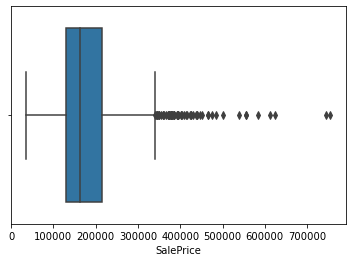

In [7]:
#identifying at the target variable
#from the problem statement we know that we need to find the variable that best predict the Price of House
#so our target variable will be the Price of House i.e. SalePrice

sns.boxplot(df['SalePrice'])
#we can see that there are ouliers present, but in real estate this is possible 
#as few houses can actually have a price which is very high or very low compared to the usual price range

In [8]:
pd.set_option('display.max_rows', None) 

In [9]:
#finding the percentage of missing values
print(round(((df.isna().sum())/len(df))*100,2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

## Missing Value Treatment

In [10]:
#looking at Alley column
df['Alley'].value_counts()
#from the data description we get that NA represents that there is no alley access.
#so we impute the null values with No_Access

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
#impute the null values of Alley with No_Access
df['Alley']=df['Alley'].fillna("No_Access")

In [12]:
#looking at LotFrontage variable
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
#we see that the mean and median are very close so imputing the missing values with median
df.loc[np.isnan(df['LotFrontage']),['LotFrontage']]=df['LotFrontage'].median()

In [14]:
#looking at FireplaceQu 
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [15]:
#impute the null values of FireplaceQu with No_Fireplace
df['FireplaceQu']=df['FireplaceQu'].fillna("No_FireplaceQu")

In [16]:
#looking at PoolQC
df['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [17]:
#impute the null values of FireplaceQu with No_Fireplace
df['PoolQC']=df['PoolQC'].fillna("No_PoolQC")


In [18]:
#looking at Fence variable
df['Fence'].isnull().sum()
#from the data description we get that NA represents that there is no fence.
#so we impute the null values with No_fence

1179

In [19]:

#impute the null values of Fence with No_Fence
df['Fence']=df['Fence'].fillna("No_Fence")

In [20]:
#looking at MiscFeature
df['MiscFeature'].isnull().sum()
#from the data description we get that NA represents that there is no miscellaneous feature.
#so we impute the null values with No_MiscFeature

1406

In [21]:
#impute the null values with No_MiscFeature
df['MiscFeature']=df['MiscFeature'].fillna("No_MiscFeature")

In [22]:
# looking at MasVnrType variable
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [23]:
df['MasVnrType'].isnull().sum()

8

In [24]:
#we will be imputing the missing values with mode
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [25]:
#looking at MasVnrArea
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [26]:
#imputing the missing MasVnrArea with median
df.loc[np.isnan(df['MasVnrArea']),['MasVnrArea']]=df['MasVnrArea'].median()

In [27]:
#looking at BsmtQual variable
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [28]:
#impute the null values with No_BsmtQual
df['BsmtQual']=df['BsmtQual'].fillna("No_BsmtQual")

In [29]:
#looking at BsmtCond variable
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [30]:
#impute the null values with No_BsmtCond as given in business logic
df['BsmtCond']=df['BsmtCond'].fillna("No_BsmtCond")

In [31]:
#looking at BsmtExposure
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [32]:
#impute the null values with No_BsmtExposure as given in business logic
df['BsmtExposure']=df['BsmtExposure'].fillna("No_BsmtExposure")

In [33]:
#looking at BsmtFinType1
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [34]:
#impute the null values with No_BsmtFinType1 as given in business logic
df['BsmtFinType1']=df['BsmtFinType1'].fillna("No_BsmtFinType1")

In [35]:
#looking at BsmtFinType2
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [36]:
#impute the null values with No_BsmtFinType2 as given in business logic
df['BsmtFinType2']=df['BsmtFinType2'].fillna("No_BsmtFinType2")

In [37]:
#looking at Electrical
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [38]:
#imputing the value of Electrical with mode
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [39]:
#looking at GarageType
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [40]:
#impute the null values with No_GarageType as given in business logic
df['GarageType']=df['GarageType'].fillna("No_GarageType")

In [41]:
#looking at GarageYrBlt
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [42]:
#imputing the null values with the mode 
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

In [43]:
#looking at GarageFinish
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [44]:
#impute the null values with No_GarageFinish from business logic
df['GarageFinish']=df['GarageFinish'].fillna("No_GarageFinish")

In [45]:
#looking at GarageQual
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [46]:
#impute the null values  with No_GarageQual given the business logic
df['GarageQual']=df['GarageQual'].fillna("No_GarageQual")

In [47]:
#looking at GarageCond
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [48]:
#impute the null values of GarageCond with No_GarageCond given the business logic
df['GarageCond']=df['GarageCond'].fillna("No_GarageCond")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [50]:
print(df.shape)

(1460, 81)


## Univariate Analysis for continuous variables

In [51]:
#selecting all the continuous variables 
df_var=df.select_dtypes(include=['float64','int64'])

In [52]:
df_var.head()
#we get 38 continuous variables

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [53]:
#defining a function for univariate analysis of continuous variables
def univariate_continuous(X):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.boxplot(df[X])
    plt.subplot(1,2,2)
    sns.distplot(df[X])
    
    plt.show()

In [54]:
#finding the columns that are continuous
num_col=list(df_var.columns)
num_col

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

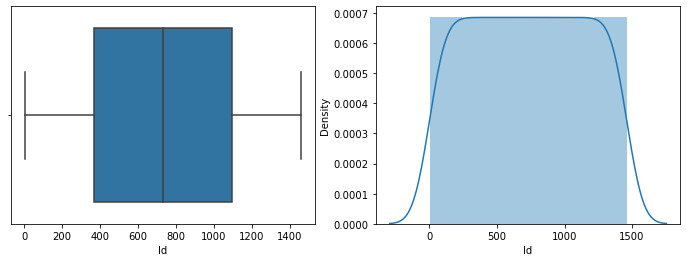

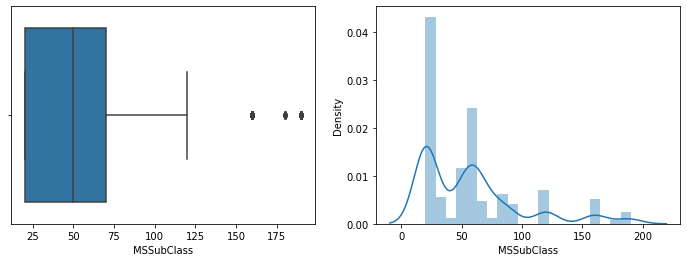

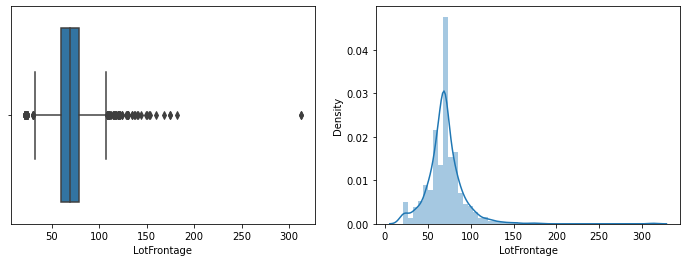

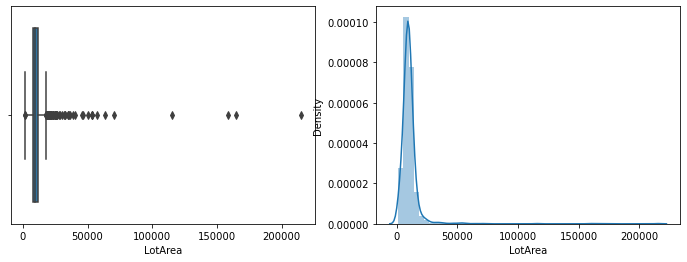

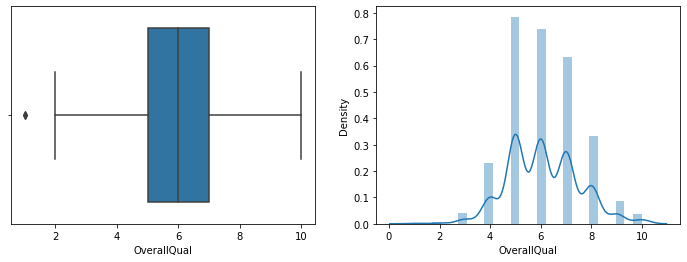

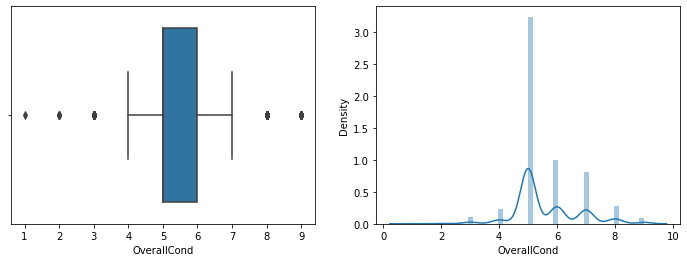

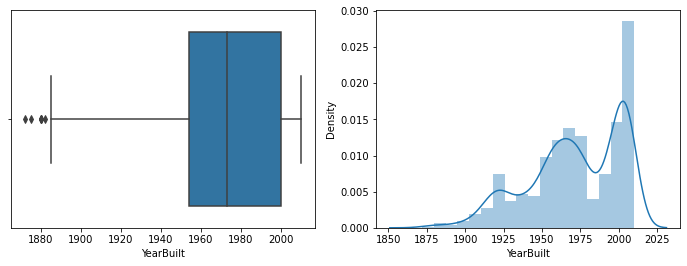

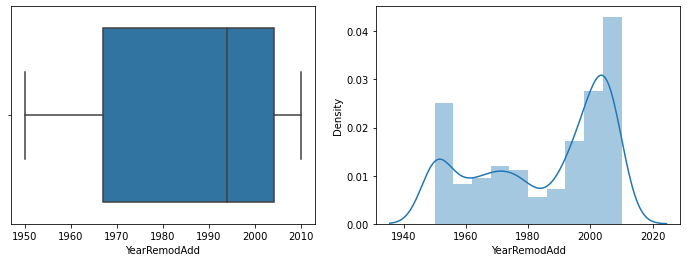

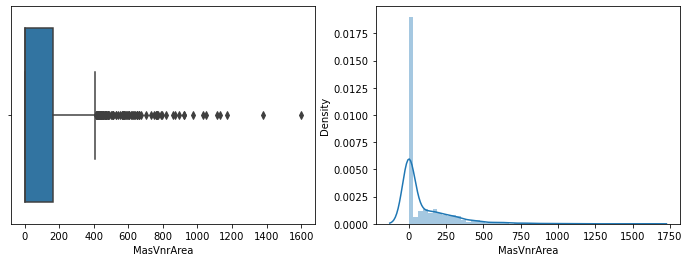

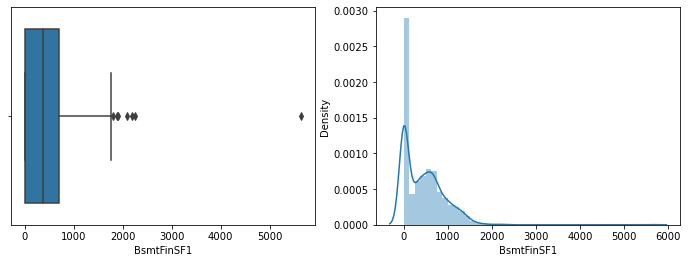

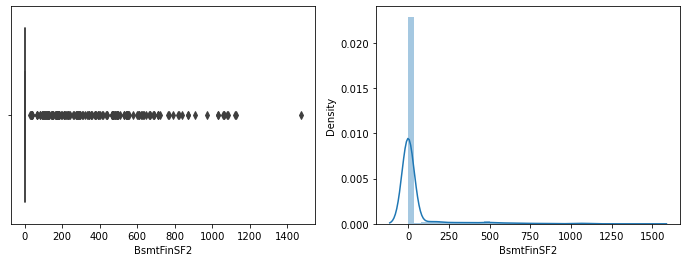

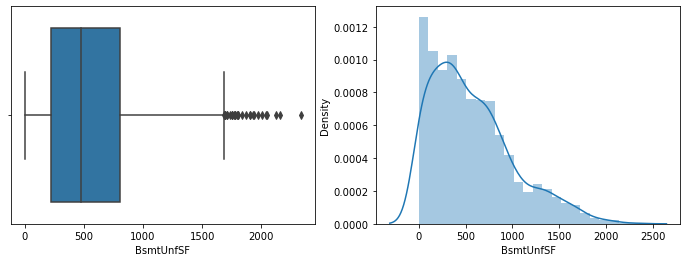

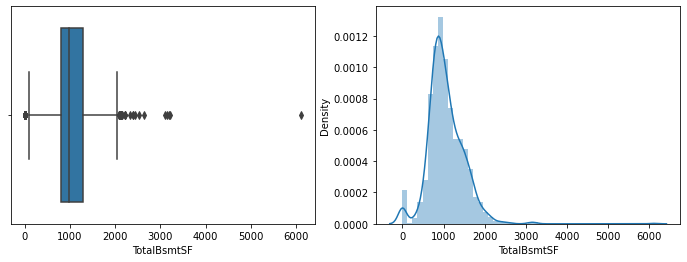

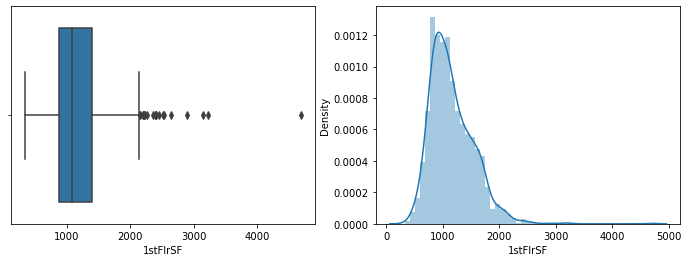

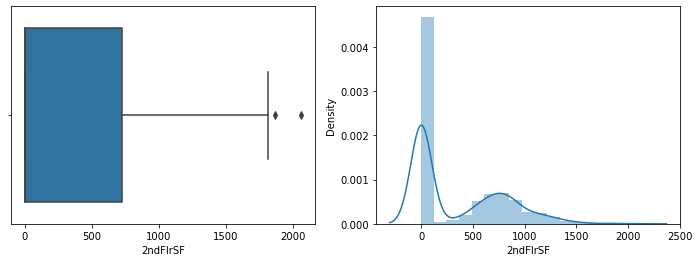

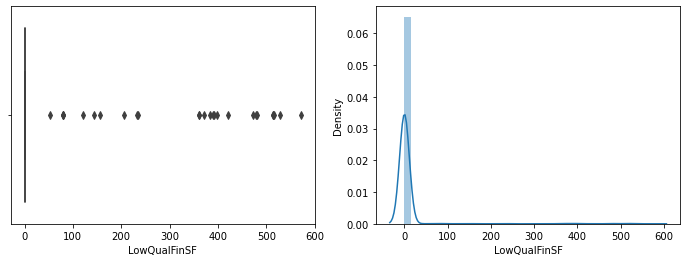

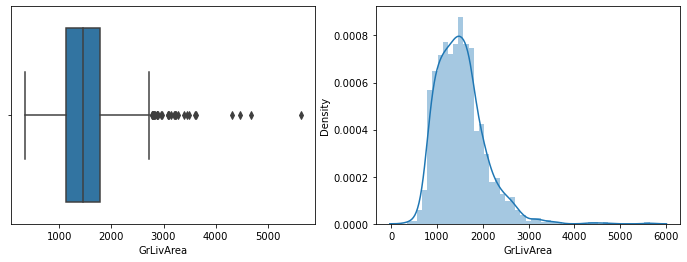

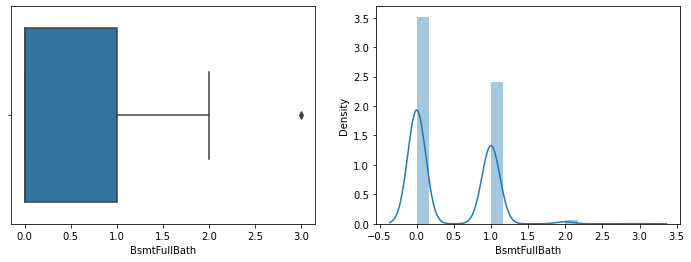

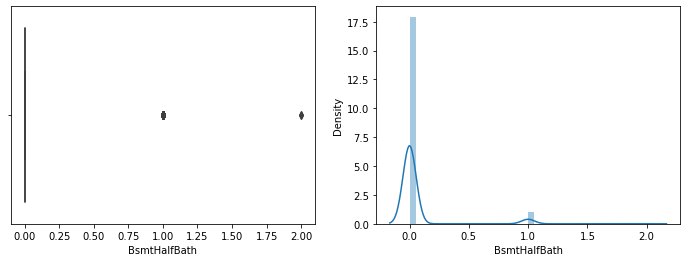

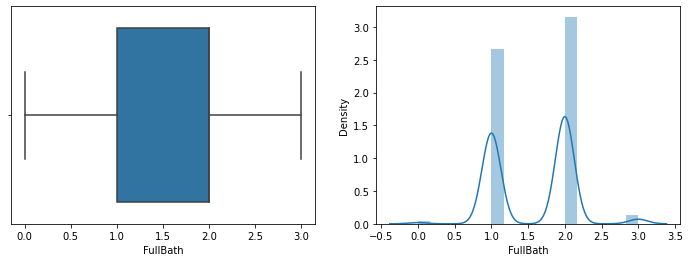

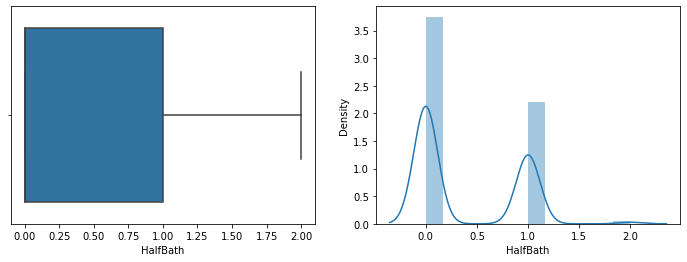

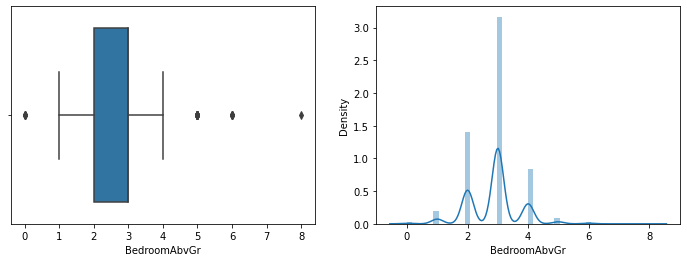

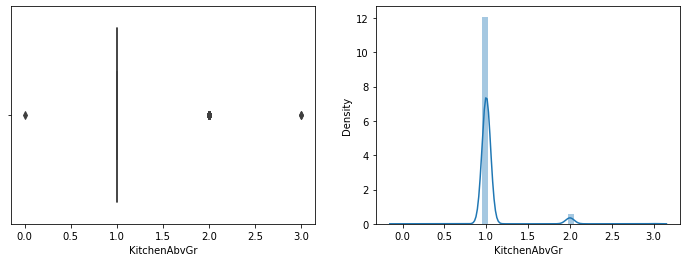

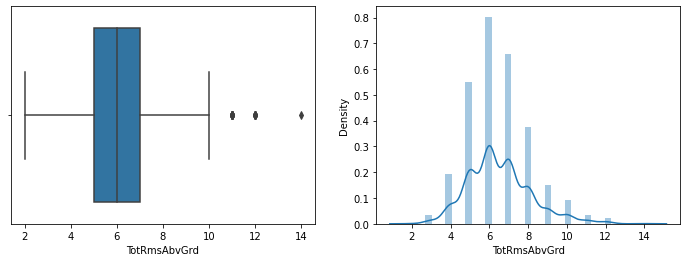

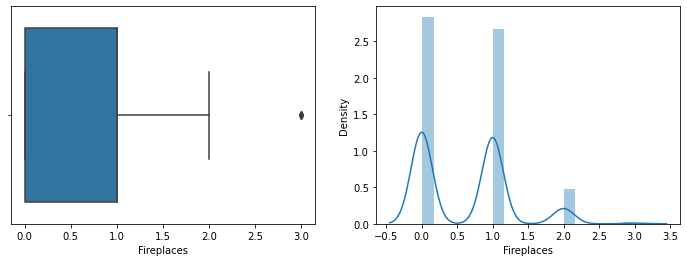

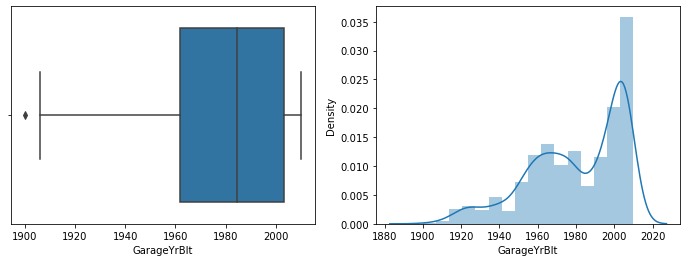

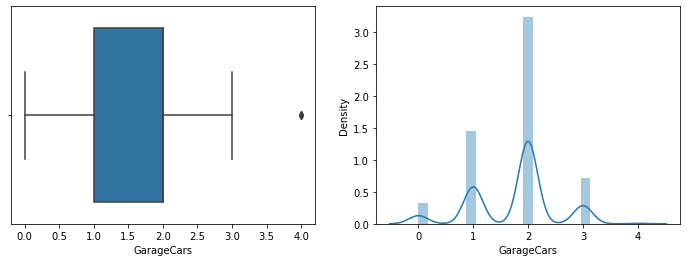

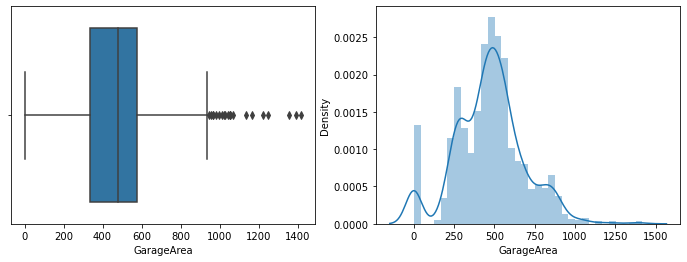

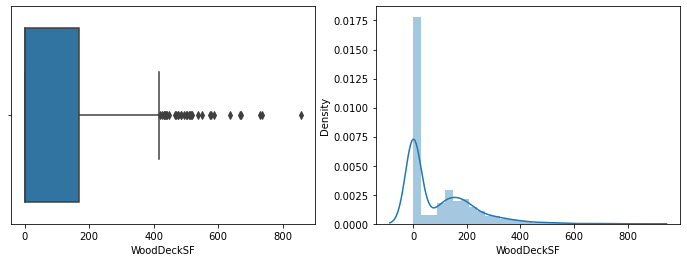

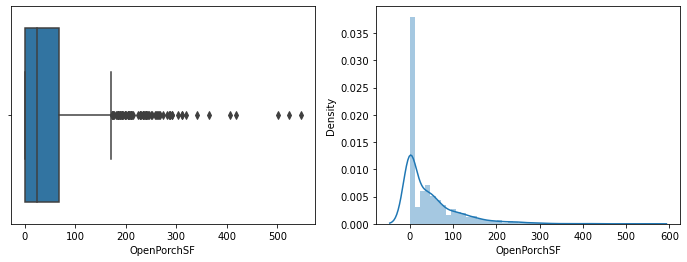

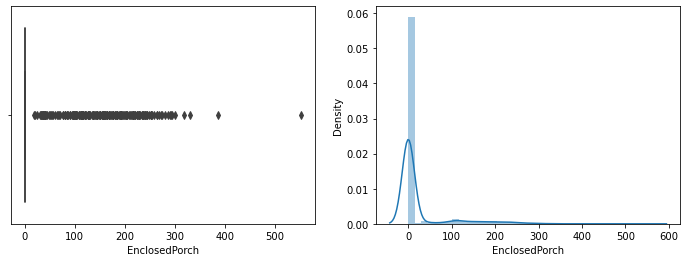

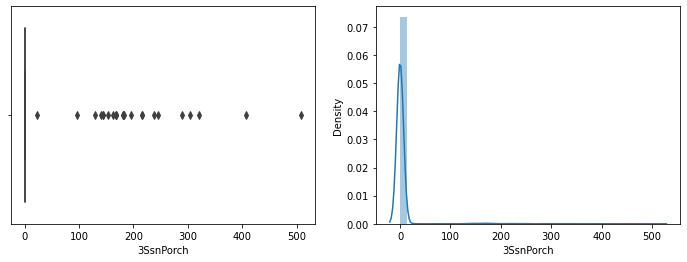

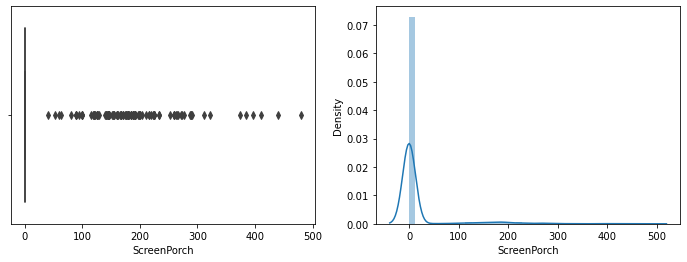

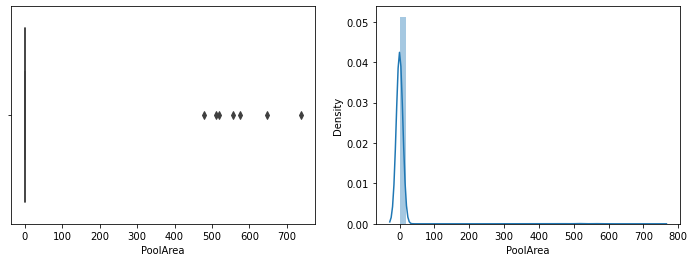

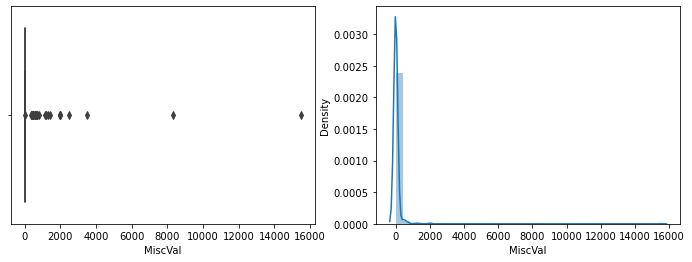

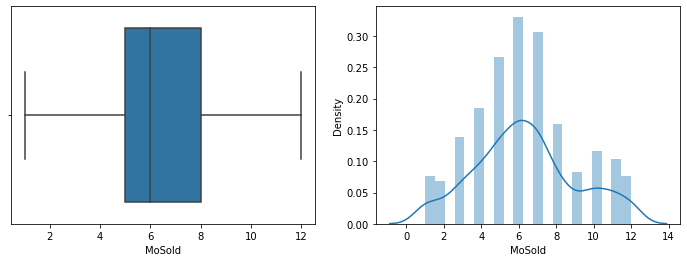

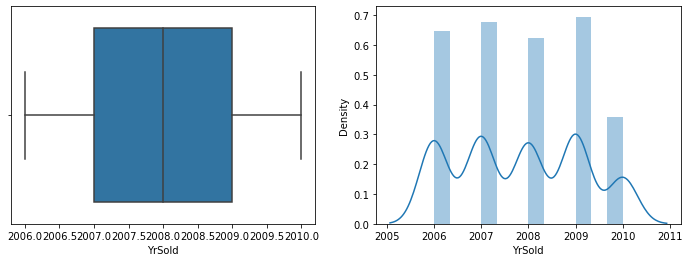

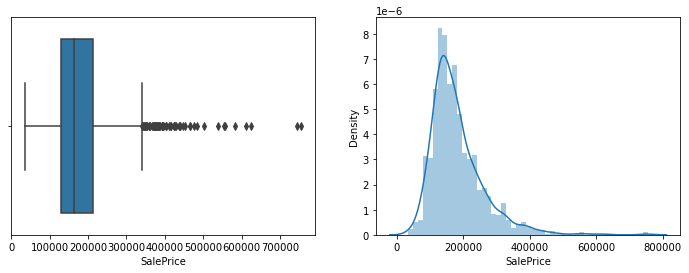

In [55]:
#calling the function for univariate analysis of continuous variables
for item in num_col:
    univariate_continuous(item)

In [56]:
#Observation from univariate analysis of continuous variables.
#MSSubClass is having few outliers with most of the values in range of 20-75.
#LotFrontage is having few outliers in both the upper end as well the lower end.
#LotArea is having huge number of outliers in the upper limit which can be accepted in Real state.
#OverallQual has outlier in the lower limit with most of the values lying between 2-10.
#OverallCond is having outliers in both the upper limit and the lower limit.
#YearBuilt is having having few outliers in the lower limit which explians that few houses were very old.
#YearRemodAdd is properly distributed with no outliers with most of the houses modified around 1995.
#MsnVnr Area is having high number of outliers on the upper limit.
#BsmtFinSF2 is having most of the values at 0 with some outliers.
#LowQualFinSF is having most of the values at 0 with some outliers.
#BsmtHalfbath is having most of the values at 0 with some outliers.
#FullBath is having most of the values as 1 or 2 with few outliers.
#BedroomAbvGr is having most of the values as 2 ,3 and 4 with few outliers.
#itchenAbvGr is having most of the values at 1 with some outliers.
#FirePlaces is having most of the values as 0and 1 with few outliers.
#GarageYrBuilt is having most of the values between 1960 to 2000 with few outliers in the lower limit.
#GarageCars is having most of the values at 1-3 with few outliers.
#EnclosedPorch is having most of the values at 0 with some outliers.
#3SsnPorch is having most of the values at 0 with some outliers.
#ScreenPorch is having most of the values at 0 with some outliers.
#PoolArea is having most of the values at 0 with some outliers.
#MiscVal is having most of the values at 0 with some outliers.
#MoSold is properly distributed and maximum number of houses were sold in May,June and July.

#SalePrice which is our target variable is having outliers in the upper extreme but it is possible in Real Estate
#to have such outliers so we will not treat these outliers and handle this using Scaling technique touse them for
#further analysis.

In [57]:
#id is the unique identity which does not give us any specific information so dropping it
df=df.drop(['Id'],axis=1)

In [58]:
#looking at MSSubClass variable we see that although it is mentioned as continuous,
#from business understanding we can see that it is unordered categorical variable
#so we will convert it to unordered categorical
df['MSSubClass']=df['MSSubClass'].astype('object')

In [59]:
df['MSSubClass'].dtype

dtype('O')

In [60]:
#looking at YearBuilt variable which tells us when the house was built
df['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
1971    22
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
1910    17
1960    17
1993    17
1978    16
1955    16
1925    16
1963    16
1967    16
1996    15
1941    15
1964    15
1969    14
1956    14
1961    14
1997    14
1948    14
1992    13
1990    12
1953    12
1949    12
1988    11
1973    11
1915    10
1900    10
1980    10
1974    10
1979     9
1926     9
1930     9
1936     9
1984     9
1939     8
1922     8
1975     8
1916     8
1924     7
1928     7
1918     7
1914     7
1923     7
1946     7
1935     6
1945     6
1931     6
1982     6
1921     6
1951     6
1985     5
1937     5
1947     5
1991     5
1981     5
1986     5
1952     5
1880     4
1929     4
1932     4
1938     4
1983     4
1927     3
1919     3

In [61]:
#creating a function to get the age of house from the time it was built
from datetime import datetime, date
def age(built):
    #built = datetime.strptime(built, "%d/%m/%Y").date()
    today = date.today()
    return (today.year - built)
  

In [62]:
#creating the derived variable yearBuilt_Age which gives the age of house from the year it was built in
df['YearBuilt_Age'] = df['YearBuilt'].apply(age)
#dropping the YearBuilt Variable as we have the age of house now
df=df.drop('YearBuilt',axis=1)


In [63]:
df['YearBuilt_Age'].describe()

count    1460.000000
mean       49.732192
std        30.202904
min        11.000000
25%        21.000000
50%        48.000000
75%        67.000000
max       149.000000
Name: YearBuilt_Age, dtype: float64

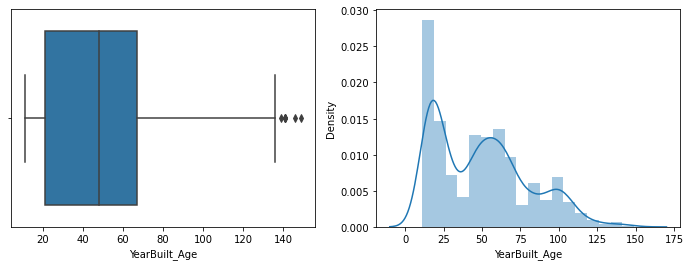

In [64]:
#plotting the YearBuilt_Age to see the distribution
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(df['YearBuilt_Age'])
plt.subplot(1,2,2)
sns.distplot(df['YearBuilt_Age'])
    
plt.show()

#Observation: we see that most of the house are 20 to 70 years old with a few outliers

In [65]:
#looking at YearRemodAdd variable which tells us when the house was remodified
df['YearRemodAdd'].value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1997     25
1977     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1971     18
1959     18
1968     17
1992     17
1978     16
1966     15
1958     15
1990     15
1962     14
1954     14
1969     14
1991     14
1963     13
1960     12
1967     12
1980     12
1973     11
1964     11
1989     11
1987     10
1975     10
1979     10
1956     10
1953     10
1957      9
1988      9
1955      9
1985      9
1961      8
1981      8
1974      7
1982      7
1984      7
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, dtype: int64

In [66]:
#creating the derived variable YearRemodAdd_Age which gives the age of house from the year it was modified
df['YearRemodAdd_Age'] = df['YearRemodAdd'].apply(age)
#dropping the YearRemodAdd Variable as we have the age when the house has been modified
df=df.drop('YearRemodAdd',axis=1)


In [67]:
df['YearRemodAdd_Age'].describe()

count    1460.000000
mean       36.134247
std        20.645407
min        11.000000
25%        17.000000
50%        27.000000
75%        54.000000
max        71.000000
Name: YearRemodAdd_Age, dtype: float64

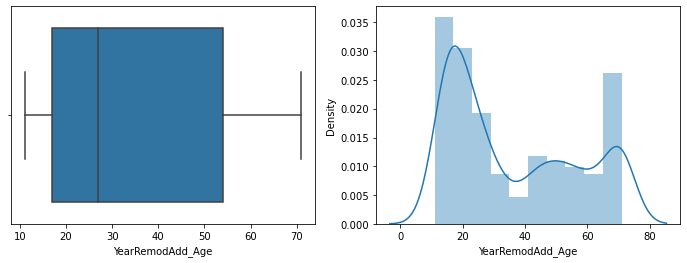

In [68]:
#plotting the YearRemodAdd_Age to see the distribution
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(df['YearRemodAdd_Age'])
plt.subplot(1,2,2)
sns.distplot(df['YearRemodAdd_Age'])
    
plt.show()


In [69]:
#looking at GarageYrBlt which tells us in which year the garage was built
df['GarageYrBlt'].head()

0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
Name: GarageYrBlt, dtype: float64

In [70]:
#creating the derived variable GarageYrBlt_Age which gives the age of garage from the year it was built
df['GarageYrBlt_Age'] = df['GarageYrBlt'].apply(age)
#dropping the GarageYrBlt Variable as we have the age of garage now
df=df.drop('GarageYrBlt',axis=1)


In [71]:
df['GarageYrBlt_Age'].head()

0    18.0
1    45.0
2    20.0
3    23.0
4    21.0
Name: GarageYrBlt_Age, dtype: float64

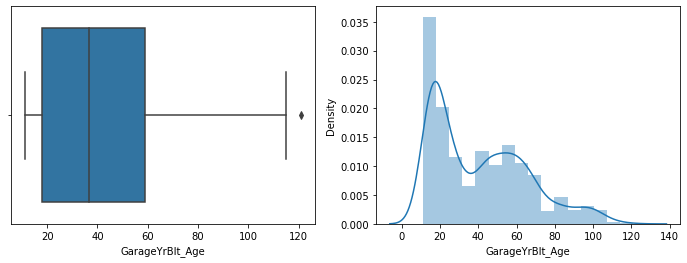

In [72]:
#plotting the GarageYrBlt_Age to see the distribution
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(df['GarageYrBlt_Age'])
plt.subplot(1,2,2)
sns.distplot(df['GarageYrBlt_Age'])
    
plt.show()


In [73]:
#looking at YrSold which tells us the year in which the house was sold
df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [74]:
#yrBuilt is not a continuous data as we have only few years, so we can treat it as categorical data
df['YrSold']=df['YrSold'].astype('object')

In [75]:
df['YrSold'].dtype

dtype('O')

In [76]:
#looking at MoSold variable which tells us the month in which the house was sold
df['MoSold'].value_counts()
#month of the year should not e treated as continuous variable , rather we can covert them to categorical variables

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [77]:
#mapping MoSold to categorical names
var=['MoSold']
df[var]=df[var].apply(lambda x: x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',
                                       6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}))


In [78]:
#changing the datatype of MoSold to object
df['MoSold']=df['MoSold'].astype('object')

In [79]:
df['MoSold'].value_counts()

Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: MoSold, dtype: int64

In [80]:
print(df.shape)

(1460, 80)


## Univariate Analysis for Categorical data

In [81]:
#selecting the categorical variables 
cat_var=df.select_dtypes(include=['object'])

In [82]:
cat_var.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,No_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,No_PoolQC,No_Fence,No_MiscFeature,Feb,2008,WD,Normal
1,20,RL,Pave,No_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,No_PoolQC,No_Fence,No_MiscFeature,May,2007,WD,Normal
2,60,RL,Pave,No_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,No_PoolQC,No_Fence,No_MiscFeature,Sep,2008,WD,Normal
3,70,RL,Pave,No_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,No_PoolQC,No_Fence,No_MiscFeature,Feb,2006,WD,Abnorml
4,60,RL,Pave,No_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,No_PoolQC,No_Fence,No_MiscFeature,Dec,2008,WD,Normal


In [83]:
#function for univariate categorical analysis
def univariate_categorical(x):
    plt.figure(figsize=(12,4))
    ax=sns.countplot(df[x],palette='Set1')
    ax.set_xlabel(x)

    total = float(len(df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    
    plt.show()

In [84]:
cat=cat_var.columns

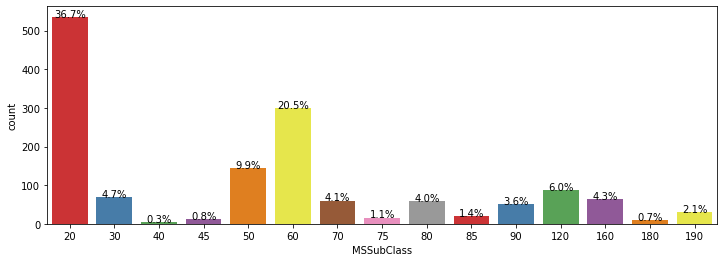

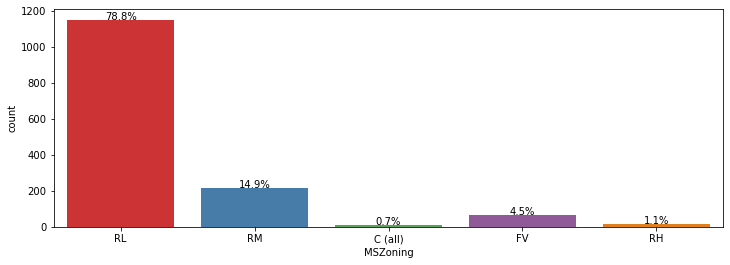

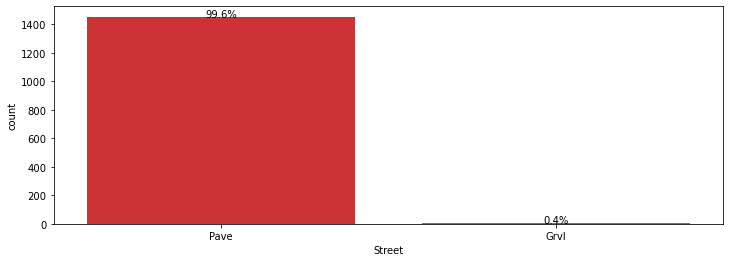

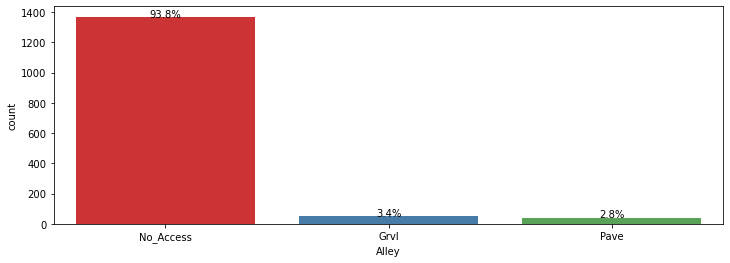

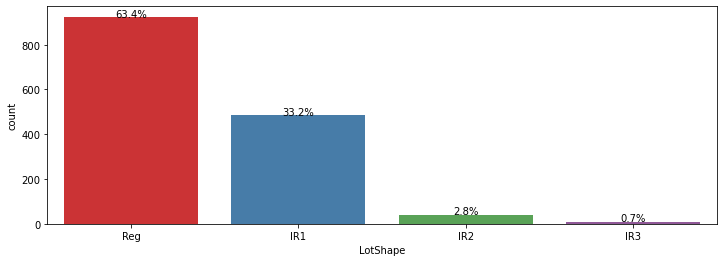

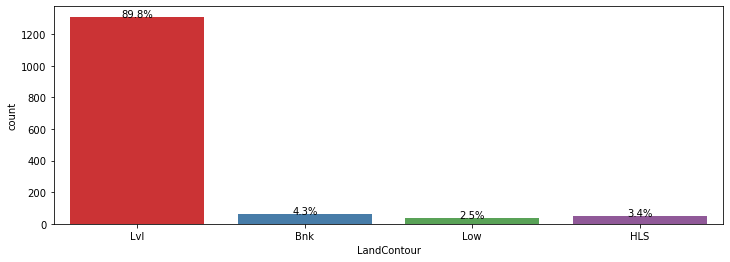

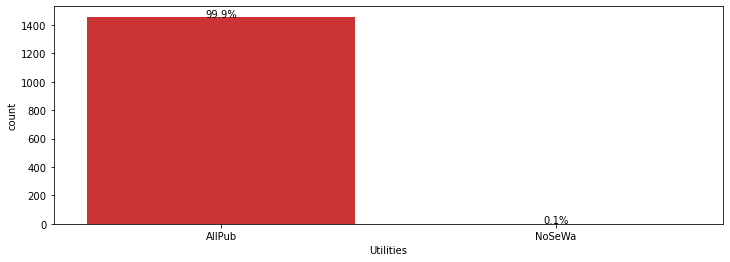

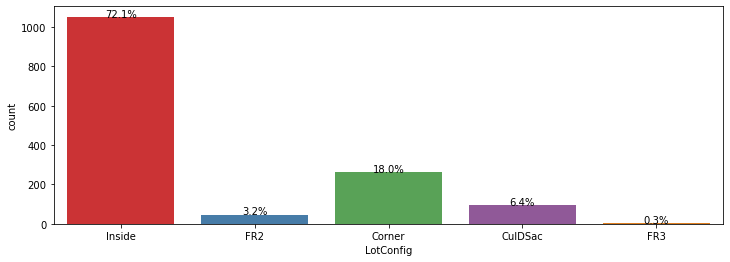

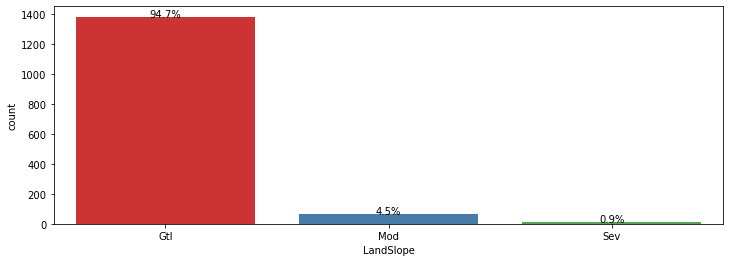

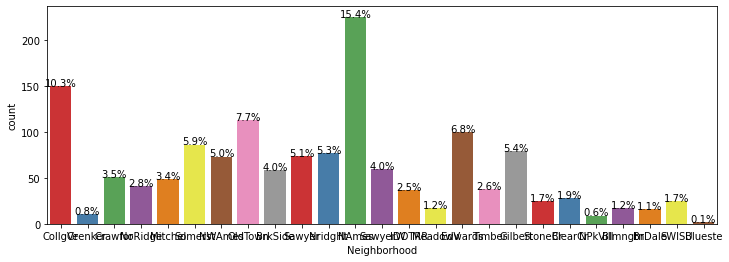

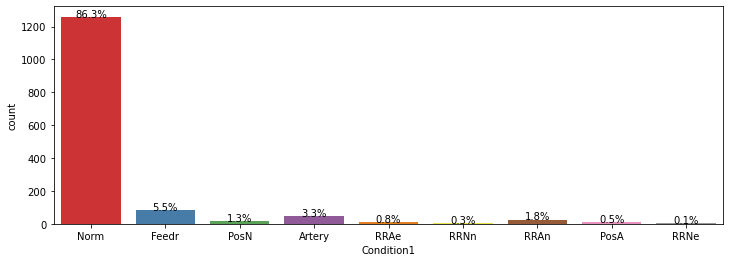

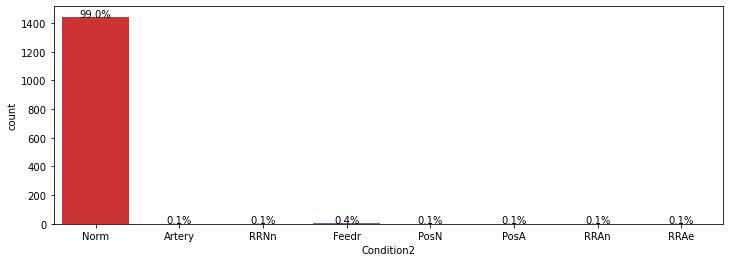

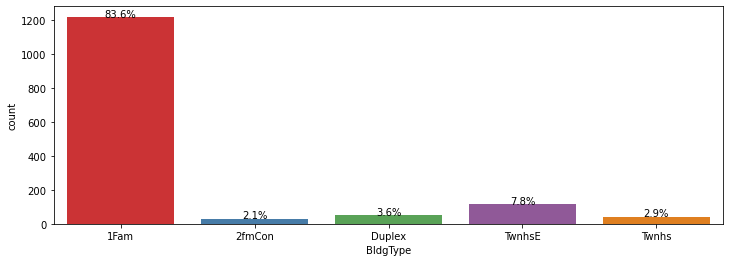

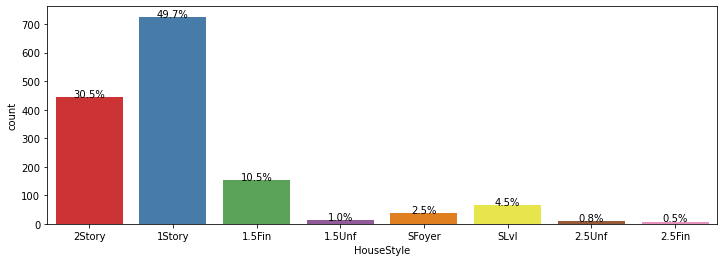

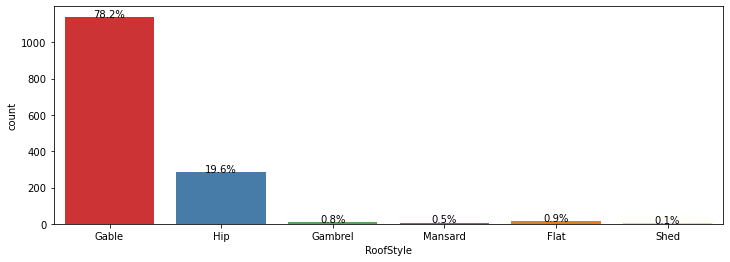

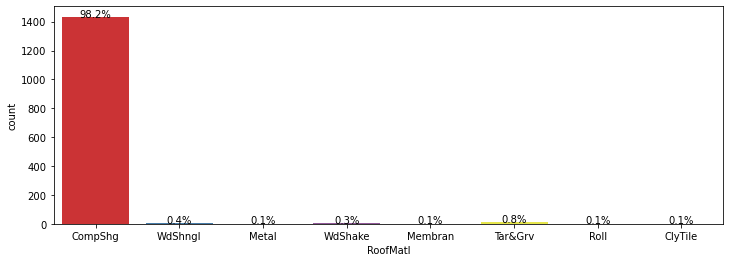

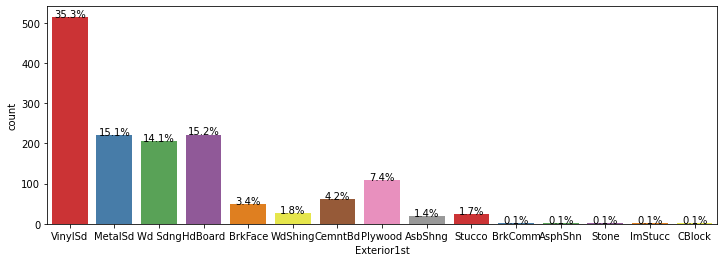

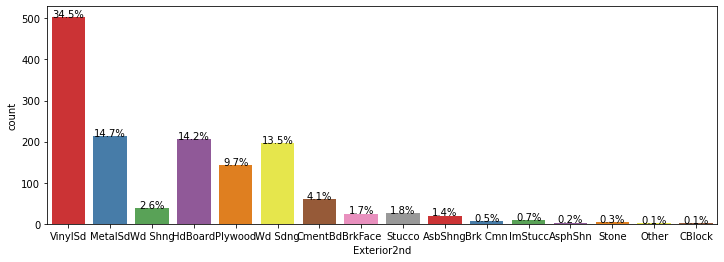

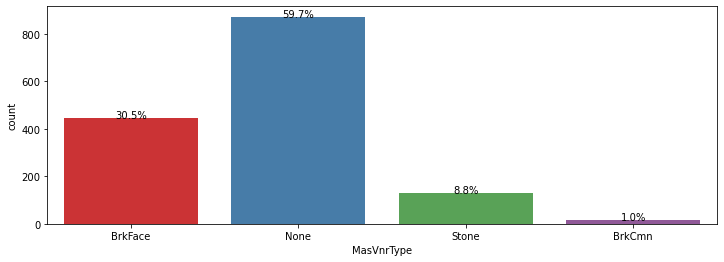

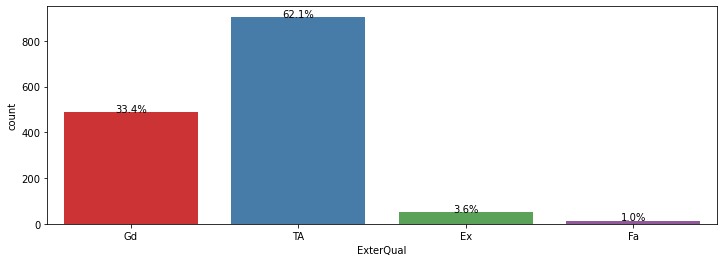

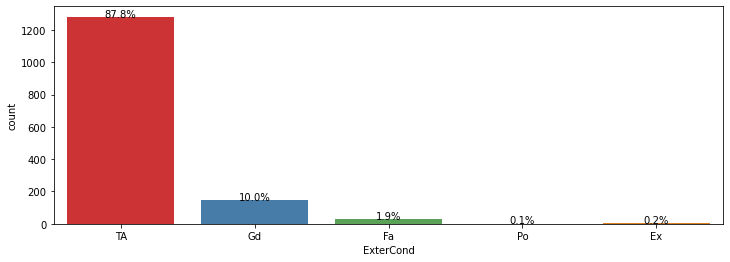

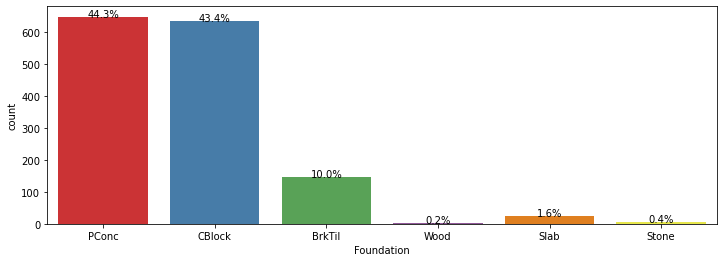

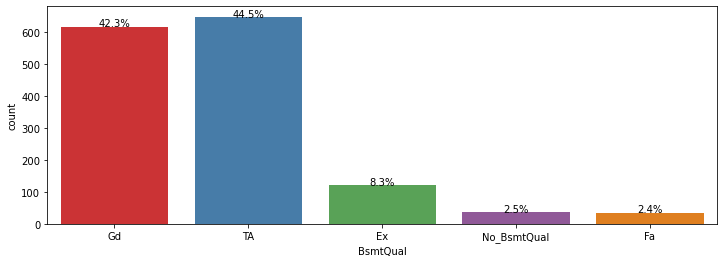

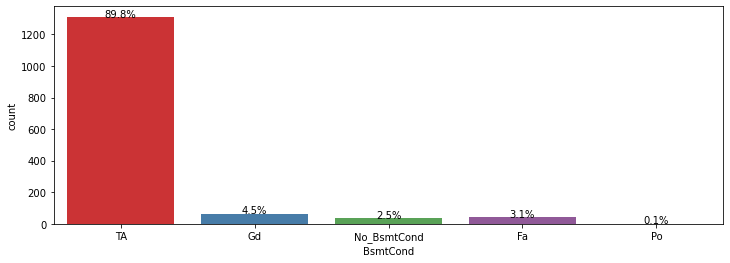

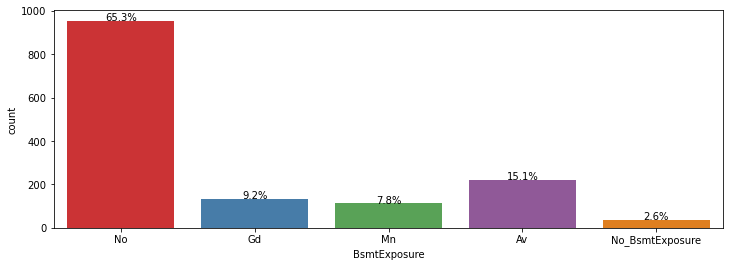

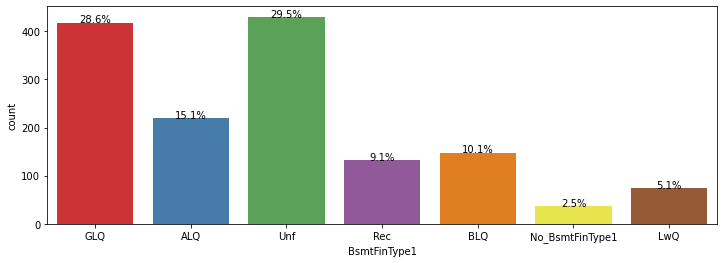

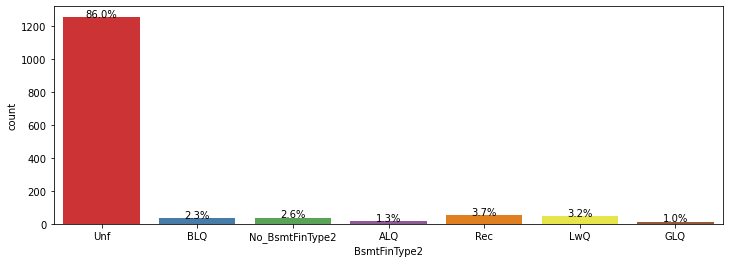

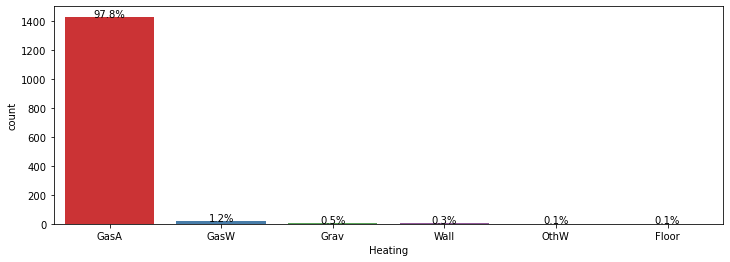

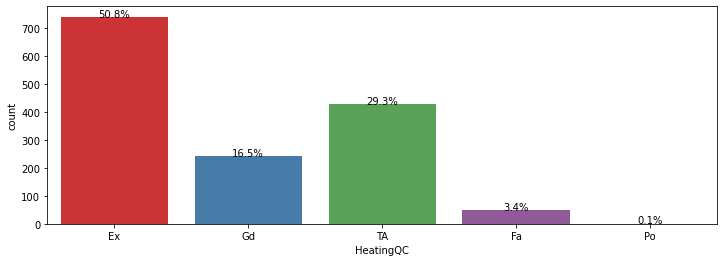

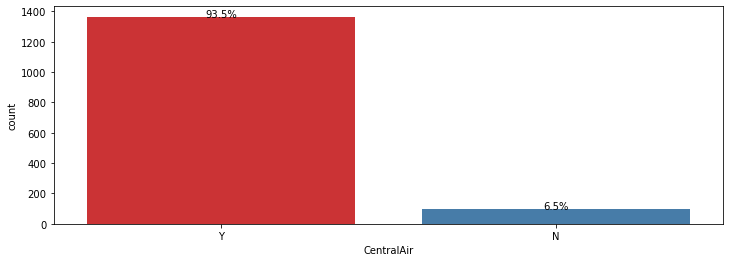

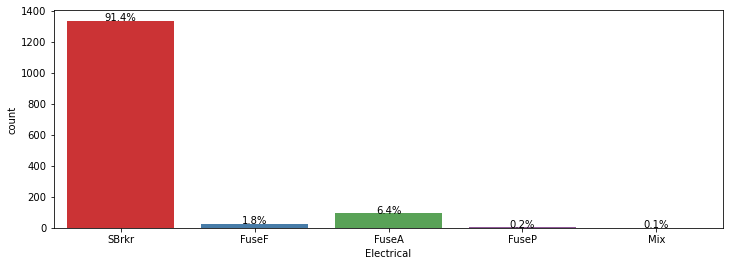

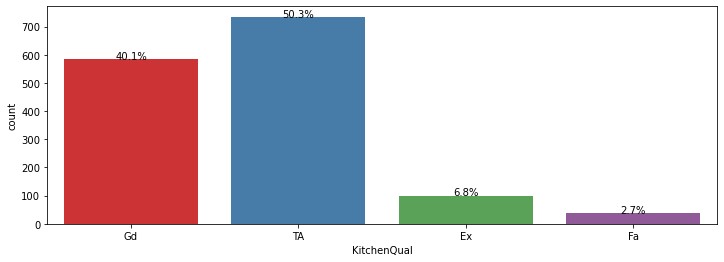

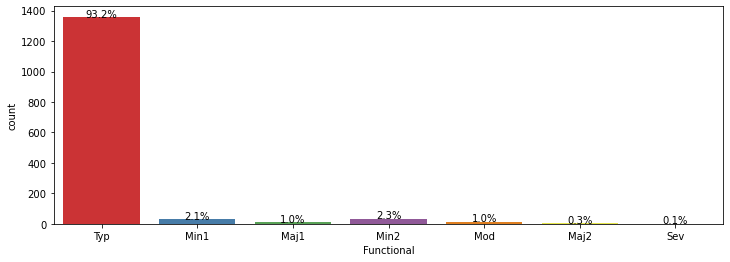

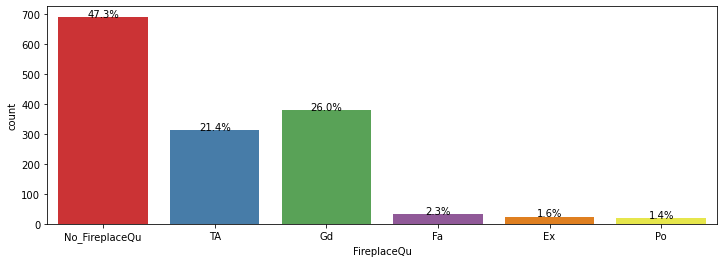

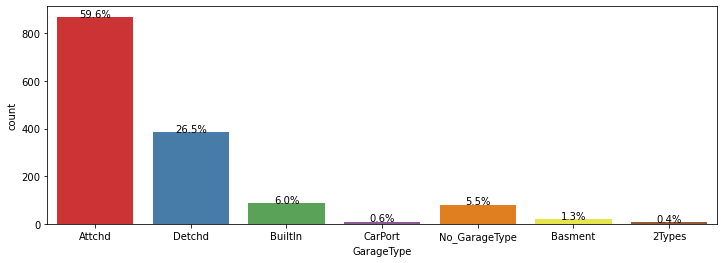

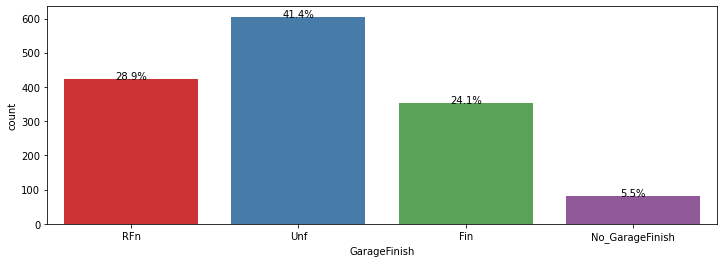

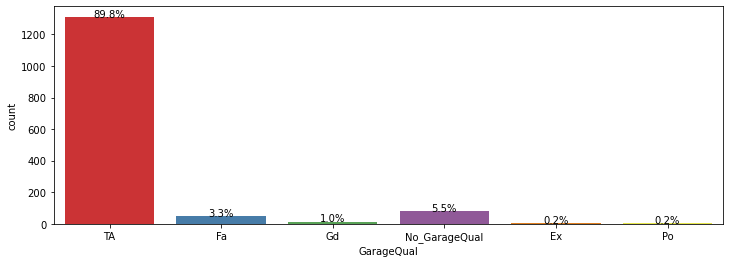

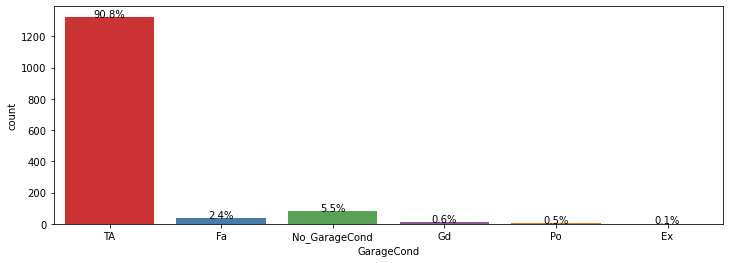

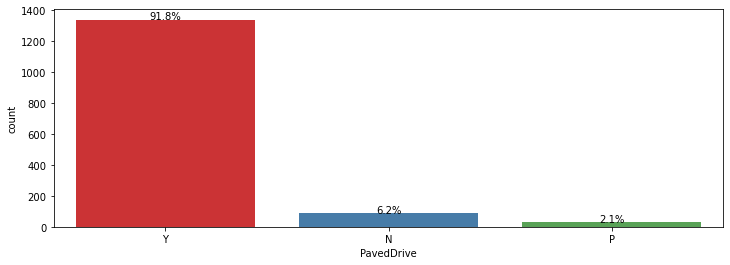

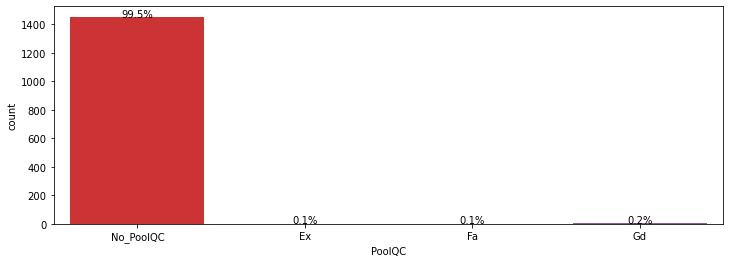

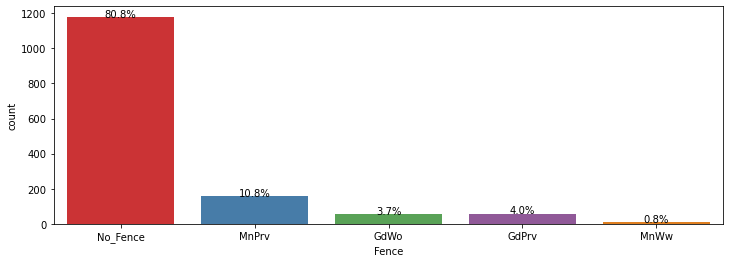

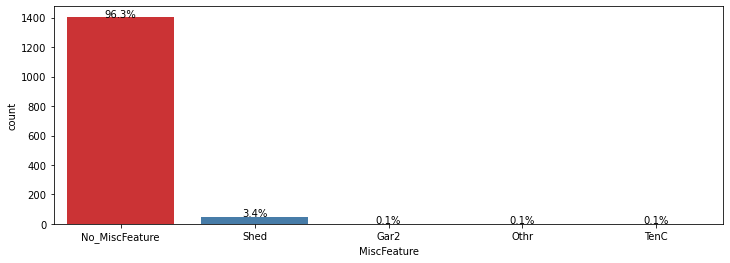

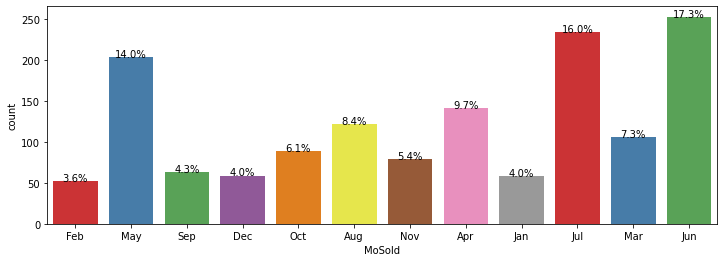

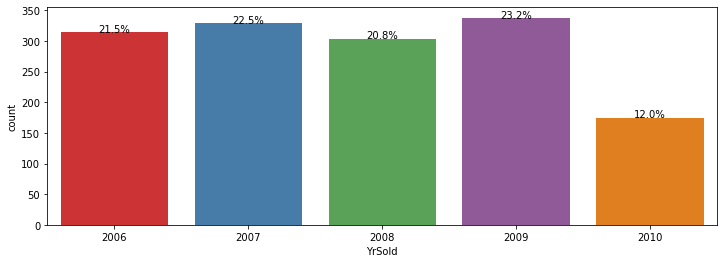

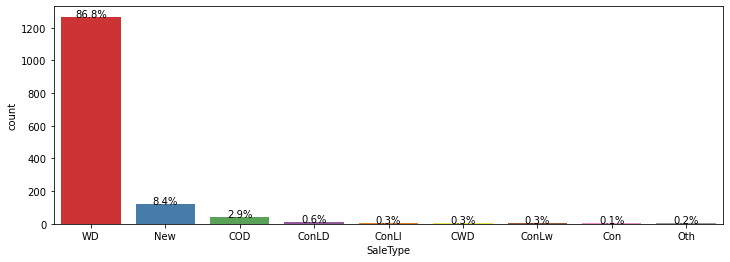

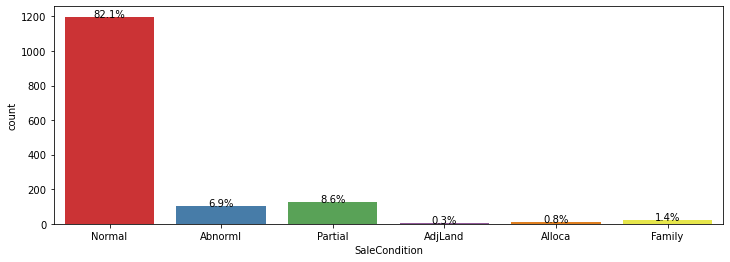

In [85]:
for item in cat:
    univariate_categorical(item)

In [86]:
#Observation fro univariate analysis of categorical variables:
#MSSubClass is having most of the records falling into category 20(1-STORY 1946 & NEWER ALL STYLES).
#LotShape has most of the records falling into Regular category followed by IR1,IR2,IR3.
#Neighbourhood has most of the records falling under NAmes.
#HouseStyle tells us that most of the houses were 1story.
#Exterior1st tells us that most of the houses sold have VinylSd in exterior.
#Exterior2nd tells us that most of the houses sold have VinylSd in exterior which we can confirm from Exterior1st , so we can concludde that Exterior2nd will not be very beneficial for further analysis.
#MasVnrType tells us that most of the hoses sold did not have Masonry veneer.
#ExterQual tells us that most of the houses sold had an average exterior quality followed by good quality.
#Foundataion tells us that most of the houses sold were having PConc and CBlock as their foundation.
#BsmtQual tells us that most of the houses sold had Average and good Besement quality.
#BsmtFinType1 tells us that most of the houses sold had Unfinished and good living quaters.
#HeatingQC tells us that most of the houses sold had Excellent and average heating Quality.
#KitchenQual tells us that most of the houses sold had average and good  kichen quality.
#FirePlaceQu tells us that most of the houses sold had no fireplace .
#Garagetype tells us that most of the houses sold had attached and detached garage.
#GArageFinish tells us that most of the houses sold had Unfinished and roughfinish .
#MoSold tells us that most of the houses were sold in May,June and July.
#YrSold tells us that the houses were sold fro 2006-2010.


In [87]:
#from the univariate categorical analysis we find that few columns is highly unbalanced, 
#the variable which have 70% or more than 70% data in a particular category , we will drop them.
#because if we use them our results will be biased due to heavy imbalance present.
cat_drop=['Street','Alley','LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','RoofMatl','Heating',
          'CentralAir','ExterCond','BsmtCond','BsmtFinType2','GarageQual','GarageCond','Fence','Electrical',
          'PavedDrive','PoolQC','MiscFeature','SaleType','SaleCondition','Functional','BldgType','RoofStyle','MSZoning',
          ]
df=df.drop(cat_drop,axis=1)

In [88]:
#looking at  Exterior1st and Exterior2nd
len(df[df['Exterior1st']!=df['Exterior2nd']])
#we find that Exterior2nd is almost same as Exterior1st with only few records with difference so we drop Exterior2nd

215

In [89]:
#dropping Exterior2nd
df=df.drop('Exterior2nd',axis=1)

In [90]:
df.shape

(1460, 52)

## Bivariate Analysis of Categorical Data

In [91]:
#creating a function for bivariate analysis of categorical variables
def bivariate_cat(x):
    plt.figure(figsize=(12,4))
    #plt.subplot(1, 2, 1)
    ax = sns.boxplot(y='SalePrice', x=x, data =df)

In [92]:
#selecting the categorical columns from the dataframe
cat_var=df.select_dtypes(include=['object'])
cat=cat_var.columns

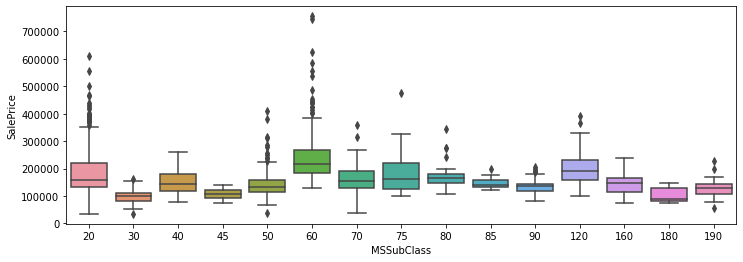

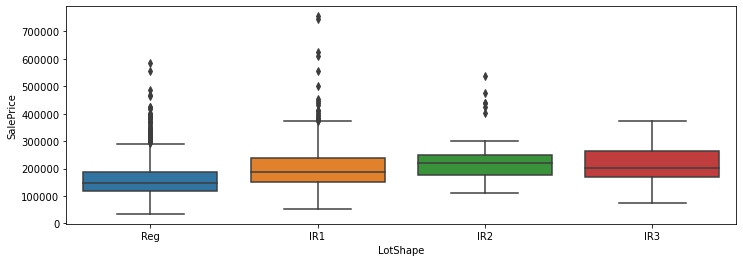

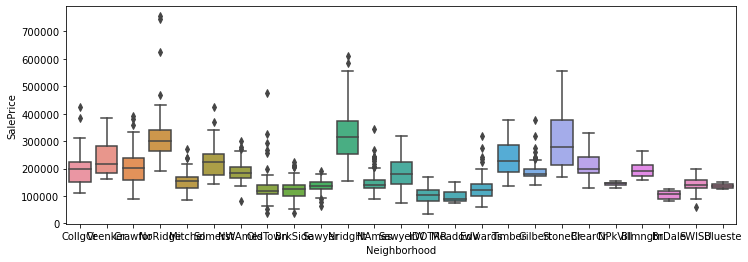

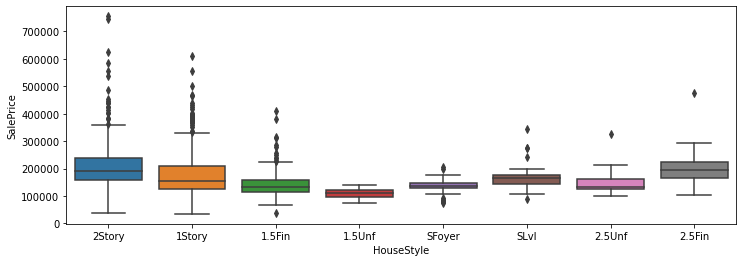

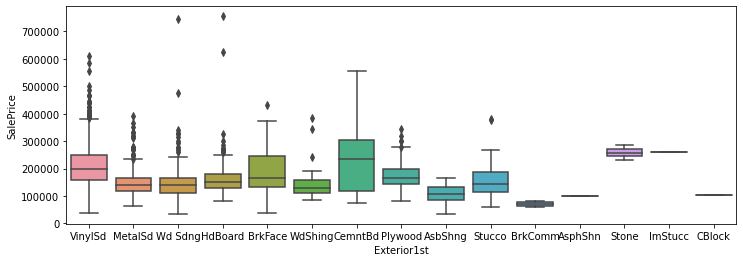

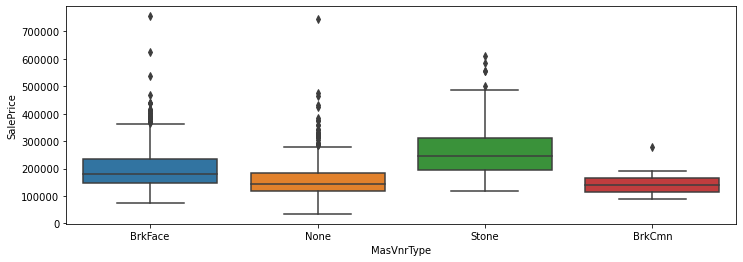

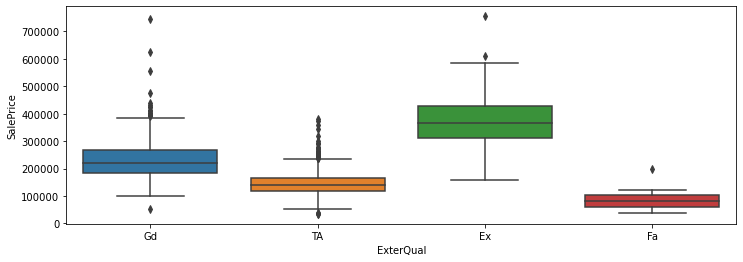

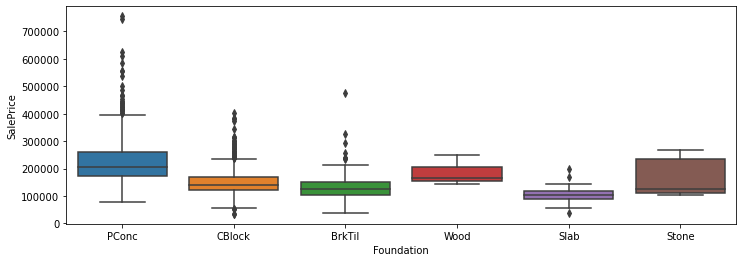

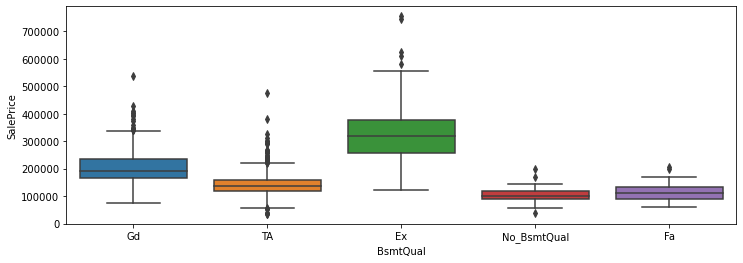

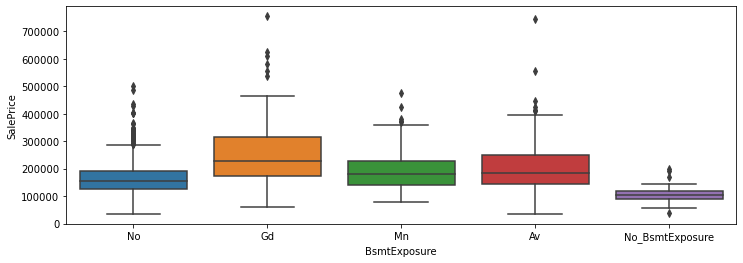

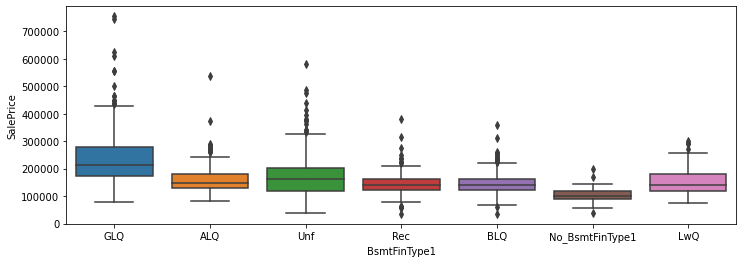

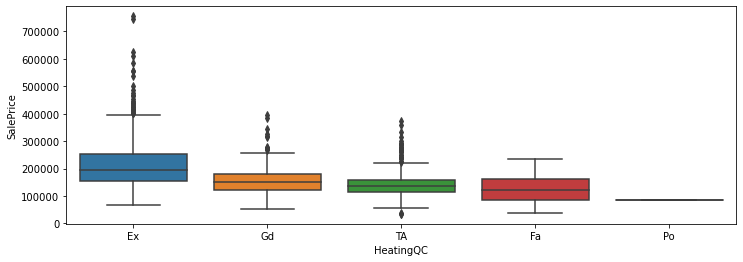

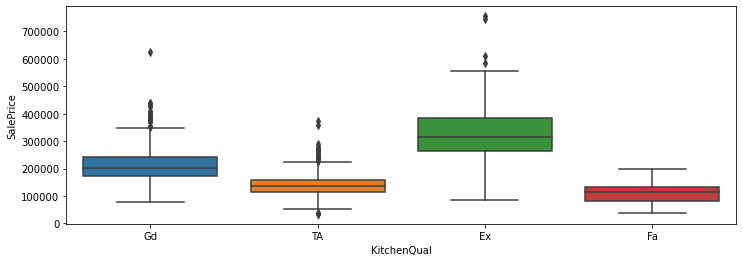

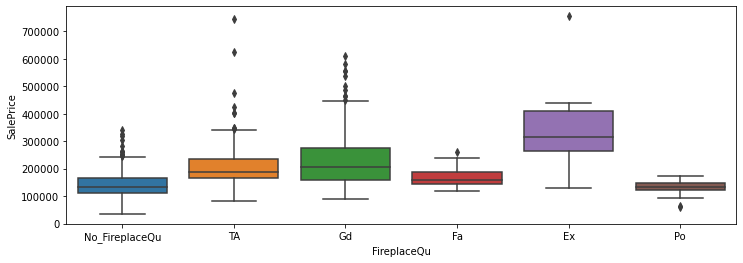

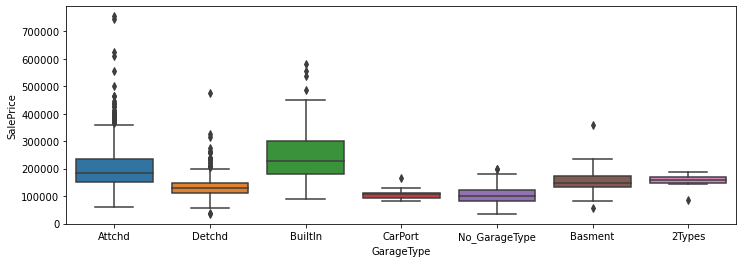

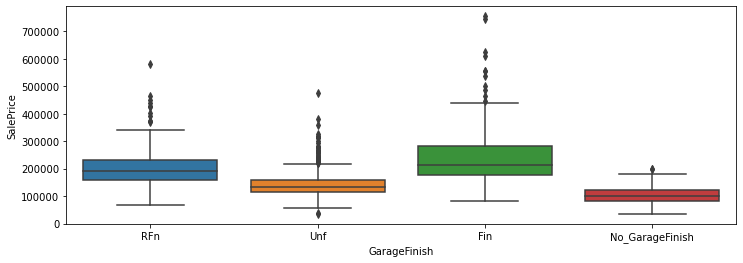

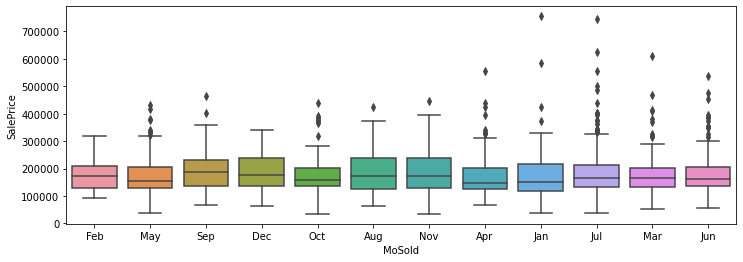

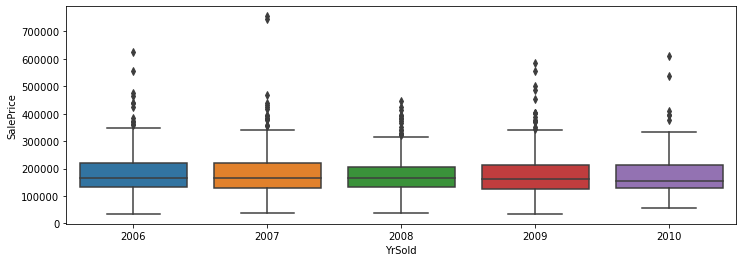

In [93]:
for item in cat:
    bivariate_cat(item)

In [94]:
#Observation from bivariate analysis of categorical variables:
#we find that Regular LotShape is have a slightly low SalePrice than other categories.
#HouseStyle with 2Story and 2.5Fin have a higher SalePrice thatn other categories.
#Exterior1st with CemntBd have higher SalePrice.
#MasVnrType tells that the Stone type has higher SalePrice
#ExterQual tells us that houses with Excellent quality exterior have higher SalePrice.
#Foundation tells us that PConc type foundation have a higher SalePrice.
#BsmtQual tells us that Excellent basement quality have higher SalePrice
#BsmtExposure with good quality have higher SalePrice.
#BsmtFinType1 with good living quarter have higher SalePrice.
#HeatingQC tells us that the houses with Excellent heating quality have higher SalePrice.
#KitchenQual tells us that Kitchen with excellent kitchen quality have higher SalePrice.
#FireplaceQu tells us that houses with excellent fireplace have higher SalePrice.
#GarageType with builtin GarageType have higher SalePrice.
#GarageFinish tells us that finished and rough finished garages have higher SalePrice.
#we see that there is not much significant difference in SalePrice in respect to MoSold and YrSold.
# 

### Bivariate Analysis of Continuous Data

In [95]:
#defining a function to perform bivariate analuysis of continuous data
def bivariate_con(x):
    sns.scatterplot(x=x,y='SalePrice',data=df)
    plt.show()
    

In [96]:
#selecting the continuous variables
num_var=df.select_dtypes(include=['float64','int64'])
num_var=num_var.columns

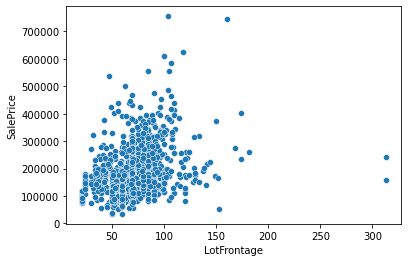

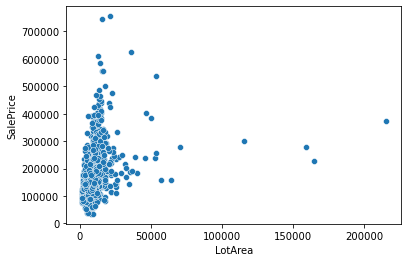

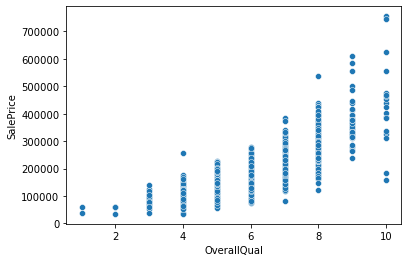

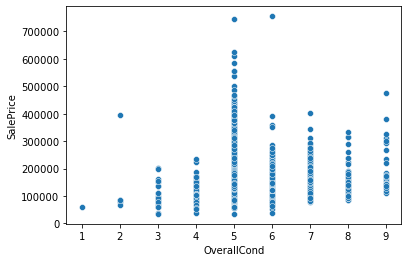

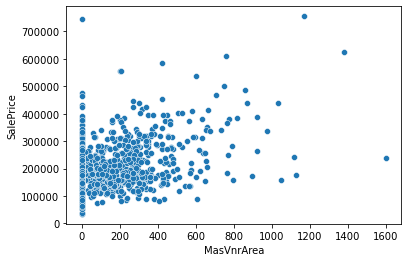

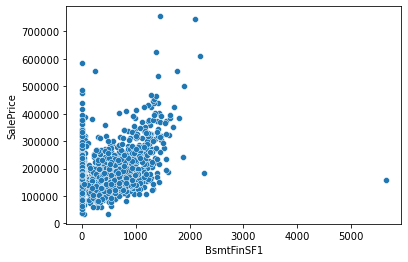

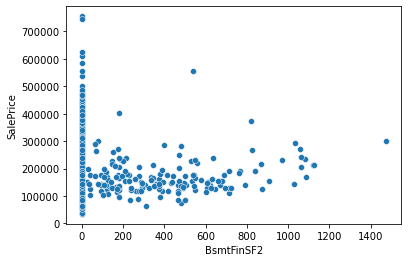

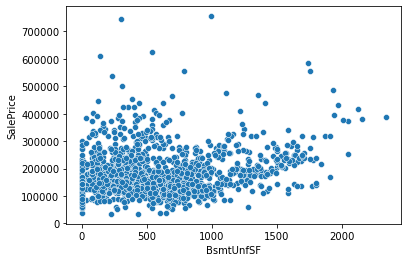

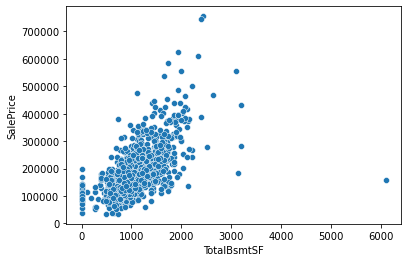

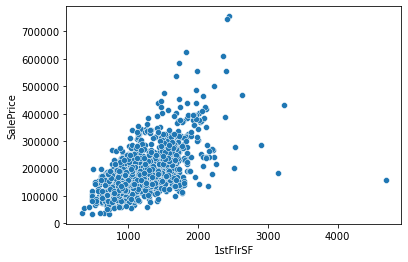

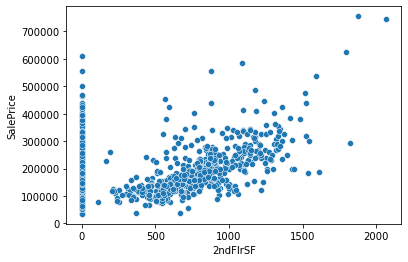

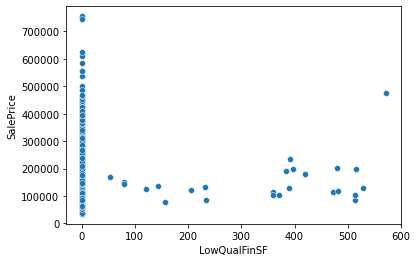

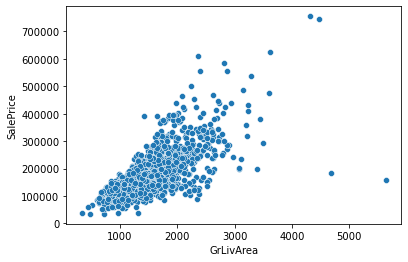

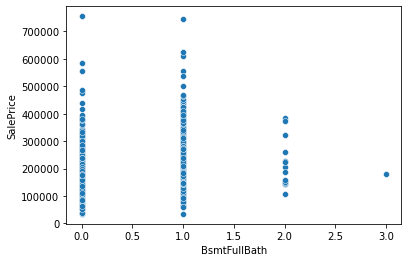

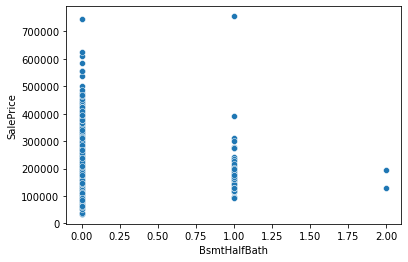

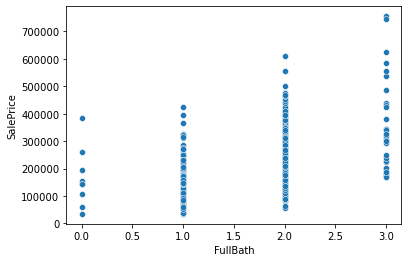

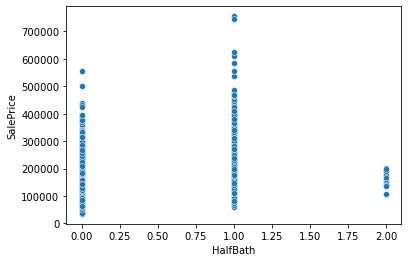

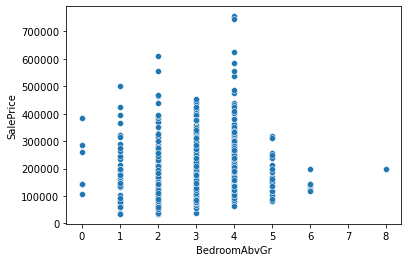

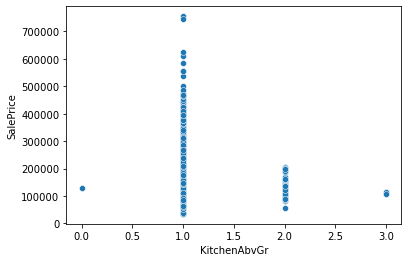

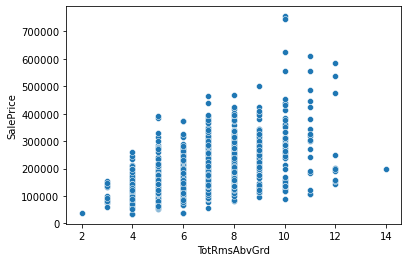

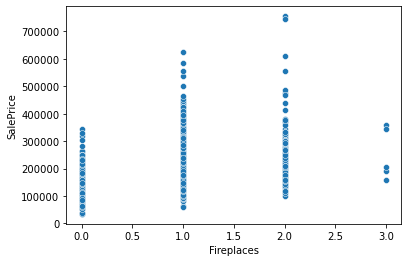

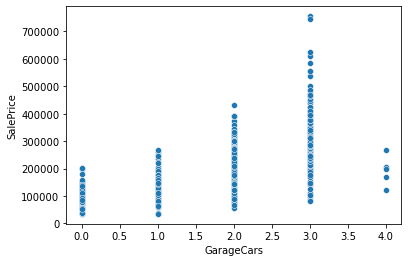

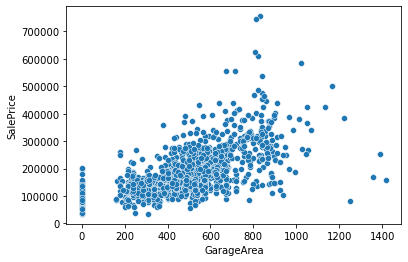

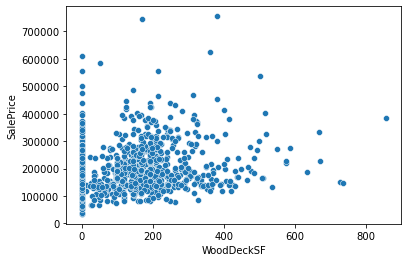

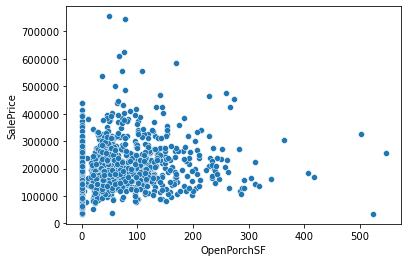

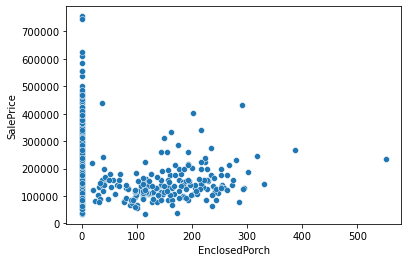

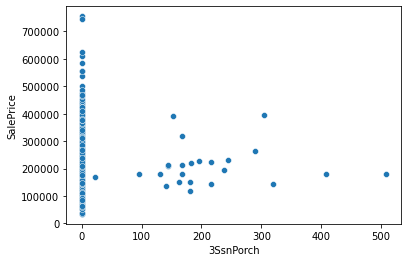

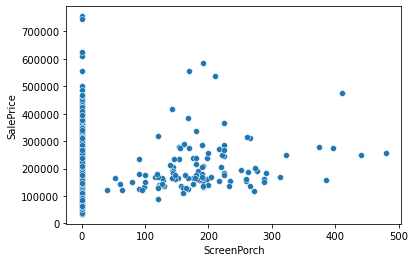

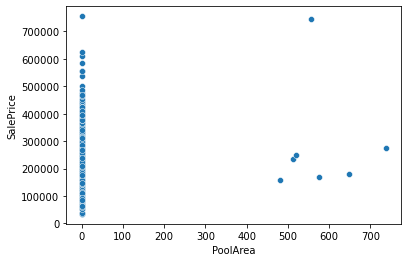

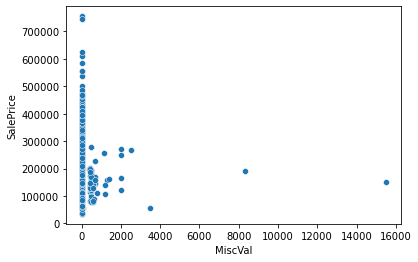

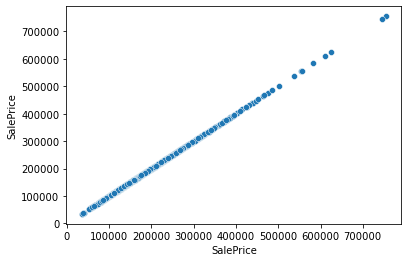

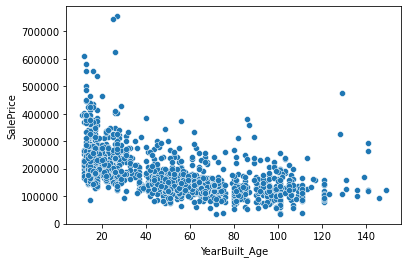

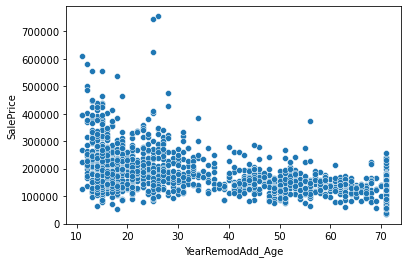

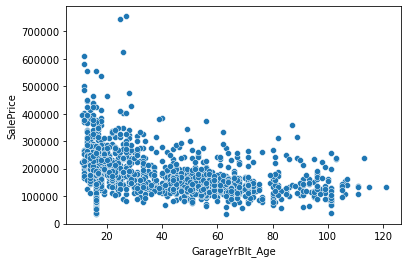

In [97]:
#calling the function for bivariate analysis of continuous variable with SalePrice
for item in num_var:
    bivariate_con(item)

In [98]:
#Observation from bivariate analysis of continuous variable with SalePrice
#we see that as the OverallQual increases SalePeice increases.
#The mean SalePrice is high for houses with OverallCond 5.
#The meanSalePrice is comparitivly lower for houses with 2 and 3 BsmtFullBath.
#The mean Sale Price is higher for 0 BsmtHalfBath.
#The mean SalePrice is higher for 3 FullBath.
#The mean SalePrice is higher with 4 BedroomAbvGr.
#The mean SalePrice is higher for 1 KitchenAbvGr.
#The mean SalePrice is higher for 1 and 2 FirePlaces.
#The mean SalePrice is higher for 3 garageCars.
#LotFrontage is slightly positivly correlated to SalePrice with few outliers.
#TotalBsmtSF is slightly positivly correlated to SalePrice with few outliers.
#1stFlrSF is slightly positivly correlated to SalePrice with few outliers.
#GrLivArea is  positivly correlated to SalePrice with few outliers.


In [99]:
#from bivariate analysis of continuous variables with the target variable we get that most of the variables
#have one value with few outliers,and is not explaining the change in target variable so we drop them.
drop_con=['LowQualFinSF','3SsnPorch','ScreenPorch','PoolArea','MiscVal','KitchenAbvGr']
df=df.drop(drop_con,axis=1)

In [100]:
df.shape

(1460, 46)

## Multivariate Analysis

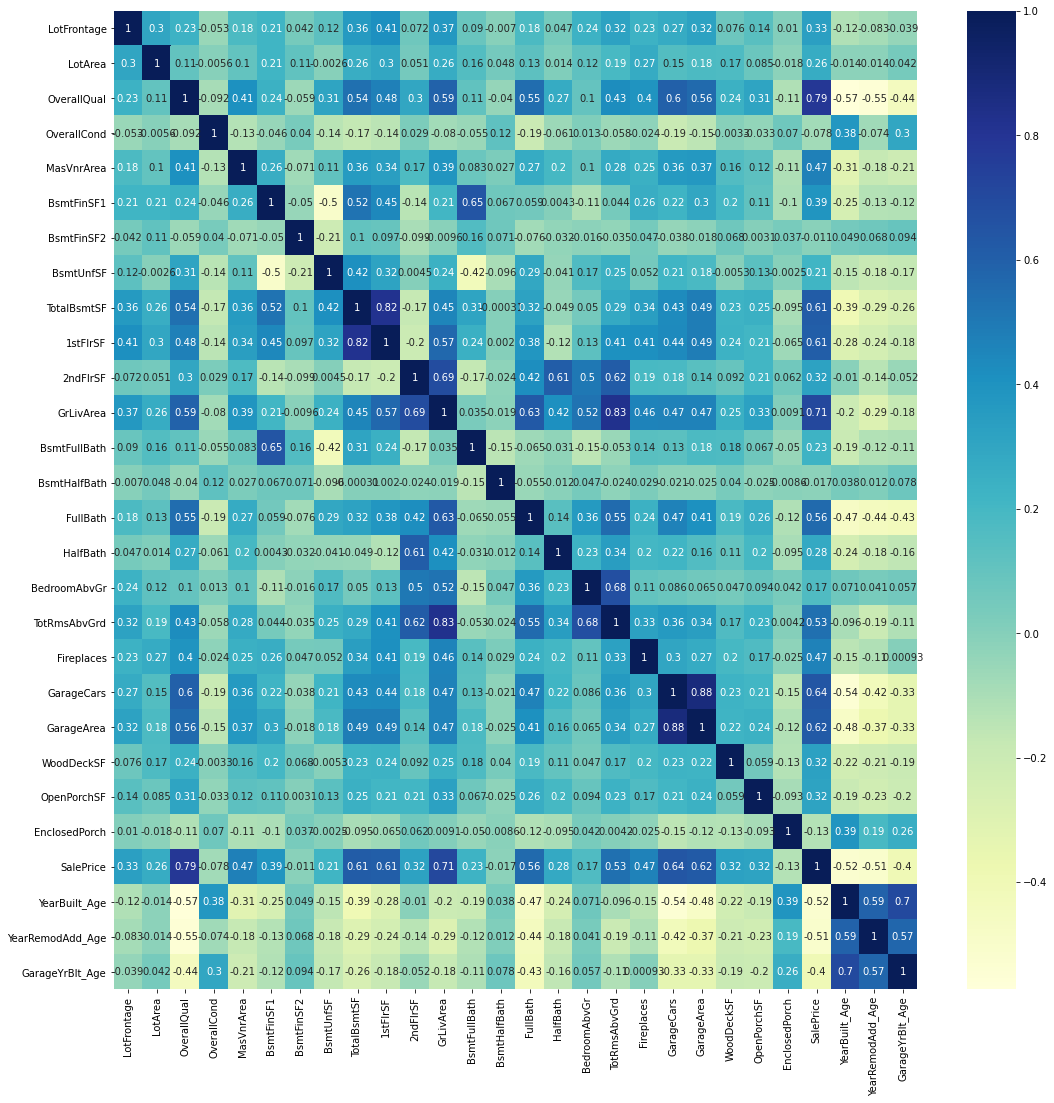

In [101]:
#looking at the multivariate analysis
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [102]:
#Observation from Multivariate analysis:

#OverallQual, GrLivArea,GArageArea and GarageCars are have high positive correlation with SalePrice.

#OverallCond,MsntFinSF2,BsmtHalfBath,EnclosedPorch,YearBuilt_Age,YearRemodAdd_Age,garageYrBuilt_Age 
#are negetivly correlated to SalePrice.

#GarageArea and GarageCars are having high positive correlation.

#TotalBsmtSF and GrLivArea are having high positive correlation.

#TotalBsmtSF and 1stFlrSF are having high positive correlation.

### Derived metrics and Data Preparation

In [103]:
#looking at the categorical variables left
cat_var=df.select_dtypes(include=['object'])
cat_var=cat_var.columns
cat_var

Index(['MSSubClass', 'LotShape', 'Neighborhood', 'HouseStyle', 'Exterior1st',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'MoSold', 'YrSold'],
      dtype='object')

In [104]:
#when we look at ExterQual variable we find that there is some oreder as good, excellenet average etc.
#so we will convert it to ordered categorical poor-->Fair-->Average-->good-->Excellent
#Po-->Fa-->TA-->Gd-->Ex  =  0-->1-->2-->3-->4

df[['ExterQual']]=df[['ExterQual']].apply(lambda x:x.map({'Fa':1,'TA':2,'Gd':3,'Ex':4}))

In [105]:
#when we look at BsmtQual variable we find that there is some oreder as good, excellenet average etc.
#so we will convert it to ordered categorical:  no basement-->poor-->Fair-->Average-->good-->Excellent
#No_BsmtQual-->Po-->Fa-->TA-->Gd-->Ex  =  0-->1-->2-->3-->4-->5

df[['BsmtQual']]=df[['BsmtQual']].apply(lambda x:x.map({'No_BsmtQual':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}))

In [106]:
#when we look at BsmtExposure variable we find that there is some oreder as good, excellenet average etc.
#so we will convert it to ordered categorical :No_BsmtExposure = No-->Minimum-->Average-->good
#No_BsmtExposure=No-->Mn-->Av-->Gd  =  0=0-->1-->2-->3

df[['BsmtExposure']]=df[['BsmtExposure']].apply(lambda x:x.map({'No_BsmtExposure':0,'No':0,'Av':1,'Mn':2,'Gd':3}))

In [107]:
#when we look at BsmtFinType1 variable we find that there is some oreder as good, excellenet average etc.
#so we will convert it to ordered categorical:  no basement-->poor-->Fair-->Average-->good-->Excellent
#No_BsmtFinType1-->Unf-->LwQ-->Rec-->BLQ-->ALQ-->GLQ =  0-->1-->2-->3-->4-->5-->6

df[['BsmtFinType1']]=df[['BsmtFinType1']].apply(lambda x:x.map({'No_BsmtFinType1':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}))


In [108]:
#when we look at HeatingQC variable we find that there is some oreder as good, excellenet average etc.
#so we will convert it to ordered categorical:  poor-->Fair-->Average-->good-->Excellent
#Po-->Fa-->TA-->Gd-->Ex  =  0-->1-->2-->3-->4

df[['HeatingQC']]=df[['HeatingQC']].apply(lambda x:x.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}))

In [109]:
#when we look at KitchenQual variable we find that there is some oreder as good, excellenet average etc.
#so we will convert it to ordered categorical:  poor-->Fair-->Average-->good-->Excellent
#Po-->Fa-->TA-->Gd-->Ex  =  0-->1-->2-->3-->4

df[['KitchenQual']]=df[['KitchenQual']].apply(lambda x:x.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}))

In [110]:
#when we look at FireplaceQu variable we find that there is some oreder as good, excellenet average etc.
#so we will convert it to ordered categorical:  no bfireplace-->poor-->Fair-->Average-->good-->Excellent
#No_FireplaceQu-->Po-->Fa-->TA-->Gd-->Ex  =  0-->1-->2-->3-->4-->5

df[['FireplaceQu']]=df[['FireplaceQu']].apply(lambda x:x.map({'No_FireplaceQu':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}))


In [111]:
df.shape

(1460, 46)

In [112]:
#creating dummy variables for LotShape
LotShape=pd.get_dummies(df['LotShape'],prefix='LotShape')
LotShape=LotShape.drop(['LotShape_IR3'],1)

#concat seasons_new to df dataframe and dropping season column
df=pd.concat([df,LotShape],axis=1)
df=df.drop(['LotShape'],axis=1)


In [113]:
#creating dummy variables for Neighborhood
Neighborhood=pd.get_dummies(df['Neighborhood'],prefix='Neighborhood')
Neighborhood=Neighborhood.drop(['Neighborhood_Blueste'],1)

#concat seasons_new to df dataframe and dropping season column
df=pd.concat([df,Neighborhood],axis=1)
df=df.drop(['Neighborhood'],axis=1)


In [114]:
print(df.shape)

(1460, 71)


In [115]:
#creating dummy variables for HouseStyle
HouseStyle=pd.get_dummies(df['HouseStyle'],prefix='HouseStyle')
HouseStyle=HouseStyle.drop(['HouseStyle_2.5Fin'],1)

#concat seasons_new to df dataframe and dropping season column
df=pd.concat([df,HouseStyle],axis=1)
df=df.drop(['HouseStyle'],axis=1)

In [116]:
#creating dummy variables for Exterior1st
Exterior1st=pd.get_dummies(df['Exterior1st'],prefix='Exterior1st')
Exterior1st=Exterior1st.drop(['Exterior1st_Stucco'],1)

#concat seasons_new to df dataframe and dropping season column
df=pd.concat([df,Exterior1st],axis=1)
df=df.drop(['Exterior1st'],axis=1)


In [117]:
#creating dummy variables for MasVnrType
MasVnrType=pd.get_dummies(df['MasVnrType'],prefix='MasVnrType')
MasVnrType=MasVnrType.drop(['MasVnrType_None'],1)

#concat seasons_new to df dataframe and dropping season column
df=pd.concat([df,MasVnrType],axis=1)
df=df.drop(['MasVnrType'],axis=1)


In [118]:
#creating dummy variables for Foundation
Foundation=pd.get_dummies(df['Foundation'],prefix='Foundation')
Foundation=Foundation.drop(['Foundation_Wood'],1)

#concat seasons_new to df dataframe and dropping season column
df=pd.concat([df,Foundation],axis=1)
df=df.drop(['Foundation'],axis=1)


In [119]:
#creating dummy variables for GarageType
GarageType=pd.get_dummies(df['GarageType'],prefix='GarageType')
GarageType=GarageType.drop(['GarageType_CarPort'],1)

#concat seasons_new to df dataframe and dropping season column
df=pd.concat([df,GarageType],axis=1)
df=df.drop(['GarageType'],axis=1)


In [120]:
#creating dummy variables for GarageFinish
GarageFinish=pd.get_dummies(df['GarageFinish'],prefix='GarageFinish')
GarageFinish=GarageFinish.drop(['GarageFinish_No_GarageFinish'],1)

#concat seasons_new to df dataframe and dropping season column
df=pd.concat([df,GarageFinish],axis=1)
df=df.drop(['GarageFinish'],axis=1)


In [121]:
#creating dummy variables for YrSold
YrSold=pd.get_dummies(df['YrSold'],prefix='YrSold')
YrSold=YrSold.drop(['YrSold_2010'],1)

#concat seasons_new to df dataframe and dropping season column
df=pd.concat([df,YrSold],axis=1)
df=df.drop(['YrSold'],axis=1)


In [122]:
#creating dummy variables for MoSold
MoSold=pd.get_dummies(df['MoSold'],prefix='MoSold')
MoSold=MoSold.drop(['MoSold_Jan'],1)

#concat seasons_new to df dataframe and dropping season column
df=pd.concat([df,MoSold],axis=1)
df=df.drop(['MoSold'],axis=1)


In [123]:
#loooking at MSSubClass variable
df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [124]:
#mapping the values of MSSubClass with their meanings from the data dictionary
df[['MSSubClass']]=df[['MSSubClass']].apply(lambda x:x.map({20:'1-STORY-1946-NEWER-ALL-STYLES',
                                                                        30:'1-STORY-1945-OLDER',
                                                                       40:'1-STORY-W/FINISHED-ATTIC',
                                                                       45:'1-1/2-STORY-UNFINISHED',
                                                                       50:'1-1/2-STORY-FINISHED',
                                                                       60:'2-STORY-1946-NEWER',
                                                                        70:'2-STORY-1945-OLDER',
                                                                        75:'2-1/2-STORY',
                                                                        80:'SPLIT-OR-MULTI-LEVEL',
                                                                        85:'SPLIT-FOYER',
                                                                        90:'DUPLEX',
                                                                        120:'1-STORY-PUD',
                                                                        150:'1-1/2-STORY-PUD',
                                                                        160:'2-STORY-PUD',
                                                                        180:'PUD-MULTILEVEL',
                                                                        190:'2-FAMILY-CONVERSION'}))


In [125]:
df['MSSubClass'].value_counts()


1-STORY-1946-NEWER-ALL-STYLES    536
2-STORY-1946-NEWER               299
1-1/2-STORY-FINISHED             144
1-STORY-PUD                       87
1-STORY-1945-OLDER                69
2-STORY-PUD                       63
2-STORY-1945-OLDER                60
SPLIT-OR-MULTI-LEVEL              58
DUPLEX                            52
2-FAMILY-CONVERSION               30
SPLIT-FOYER                       20
2-1/2-STORY                       16
1-1/2-STORY-UNFINISHED            12
PUD-MULTILEVEL                    10
1-STORY-W/FINISHED-ATTIC           4
Name: MSSubClass, dtype: int64

In [126]:
#creating dummy variables for MSSubClass
MSSubClass=pd.get_dummies(df['MSSubClass'],prefix='MSSubClass')
MSSubClass=MSSubClass.drop(['MSSubClass_DUPLEX'],1)

#concat seasons_new to df dataframe and dropping season column
df=pd.concat([df,MSSubClass],axis=1)
df=df.drop(['MSSubClass'],axis=1)

In [127]:
df.dtypes

LotFrontage                                 float64
LotArea                                       int64
OverallQual                                   int64
OverallCond                                   int64
MasVnrArea                                  float64
ExterQual                                     int64
BsmtQual                                      int64
BsmtExposure                                  int64
BsmtFinType1                                  int64
BsmtFinSF1                                    int64
BsmtFinSF2                                    int64
BsmtUnfSF                                     int64
TotalBsmtSF                                   int64
HeatingQC                                     int64
1stFlrSF                                      int64
2ndFlrSF                                      int64
GrLivArea                                     int64
BsmtFullBath                                  int64
BsmtHalfBath                                  int64
FullBath    

In [128]:
df.shape

(1460, 129)

## Train Test Split

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
df_train,df_test=train_test_split(df,train_size=0.70,random_state=100)

In [131]:
#seperating X_train and y_train
y_train=df_train.pop('SalePrice')
X_train=df_train

In [132]:
#seperating X_test and y_test
y_test=df_test.pop('SalePrice')
X_test=df_test

In [133]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1021, 128)
(439, 128)
(1021,)
(439,)


### Feature Scaling

In [134]:
#we will use Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

In [135]:
#instatiate an object
scaler=MinMaxScaler()

In [136]:
#getting the columns for which the scaling will be done
col=X_train.columns
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       ...
       'MSSubClass_1-STORY-PUD', 'MSSubClass_1-STORY-W/FINISHED-ATTIC',
       'MSSubClass_2-1/2-STORY', 'MSSubClass_2-FAMILY-CONVERSION',
       'MSSubClass_2-STORY-1945-OLDER', 'MSSubClass_2-STORY-1946-NEWER',
       'MSSubClass_2-STORY-PUD', 'MSSubClass_PUD-MULTILEVEL',
       'MSSubClass_SPLIT-FOYER', 'MSSubClass_SPLIT-OR-MULTI-LEVEL'],
      dtype='object', length=128)

In [137]:
#scaling the training set
#we will fit and then transform on traning set
X_train[col]=scaler.fit_transform(X_train[col])

In [138]:
#scaling the test set
#we will only transform on test set
X_test[col]=scaler.transform(X_test[col])

### Transforming the Target Variable

In [139]:
#we see that our target variable SalePrice is having a lot of outliers so we will take the log transformation of it.
y_train=np.log(y_train)
y_train.shape

(1021,)

In [140]:
#transforming the test data target variable
y_test=np.log(y_test)
y_test.shape

(439,)

# Model Building

## Lasso Regression

In [144]:
#list the alphas to tune - 
#if values are too high it will lead to underfitting and if too low it will not handle overfitting

params={'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
                20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,500.0,1000.0]}

In [145]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.model_selection import GridSearchCV

In [146]:
#instantiating an object of Lasso
lasso=Lasso()

In [147]:
#defining the number of cross validation folds
folds=5

In [148]:
#cross validation
model_cv=GridSearchCV(estimator=lasso,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,
                      return_train_score=True,verbose=1)

In [149]:
#fitting X_train and y_train on model_cv
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    2.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   30.0, 40.0, 50.0, 60.0, 70.0, 80.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [150]:
#printing the best suited value of alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [151]:
alpha_lasso=0.001

In [152]:
#fiiting the Lasso model for alpha = 0.001 and printing the coefficients
lasso=Lasso(alpha=alpha_lasso)

In [153]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [154]:
lasso.coef_

array([-0.        ,  0.        ,  0.5647867 ,  0.21003227,  0.        ,
        0.01369812,  0.12362599,  0.07089664,  0.0688077 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.05060107,  0.        ,
        0.        ,  0.71983297,  0.10590192,  0.        ,  0.13510002,
        0.08246547,  0.        ,  0.09166577,  0.15126155,  0.        ,
        0.10121725,  0.20924936,  0.04993865,  0.05061373,  0.        ,
        0.        , -0.03490087, -0.06912107, -0.        ,  0.        ,
        0.00452268, -0.01045233, -0.        , -0.        ,  0.        ,
        0.09368873,  0.        ,  0.10072827, -0.0573224 , -0.        ,
       -0.11151081, -0.06300975, -0.        , -0.        , -0.        ,
       -0.        ,  0.10352835,  0.09772653, -0.06418587,  0.        ,
       -0.00738245,  0.        ,  0.0809679 ,  0.04676789,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.  

In [155]:
#predicting the y_train based on X_train using lasso model
y_train_pred=lasso.predict(X_train)

In [156]:
from sklearn.metrics import r2_score,mean_squared_error

In [157]:
#finding the r2 score for training data
r2_train=r2_score(y_train,y_train_pred)
r2_train

0.8952981610917785

In [158]:
#finding the rss value for train data
rss_train=np.sum(np.square(y_train-y_train_pred))
rss_train

16.798823419924673

In [159]:
#finding the mean squared error for train data
mse_train=mean_squared_error(y_train,y_train_pred)
mse_train

0.016453304035185773

In [160]:
#finding the root mean squared error for train data
rmse_train=mse_train**0.5
rmse_train

0.12827043320728973

In [161]:
#finding the residuals
res=y_train-y_train_pred

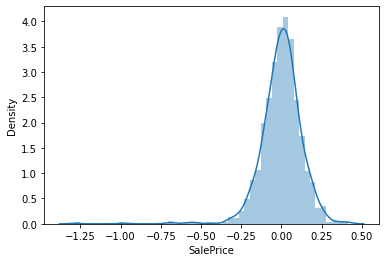

In [162]:
#checking the distribution of the residuals the verify the linear regression assumptions.
sns.distplot(res)
plt.show()
#Observation:
#We observe that the rsiduals are normally distributed with mean at 0 so it is a good model.

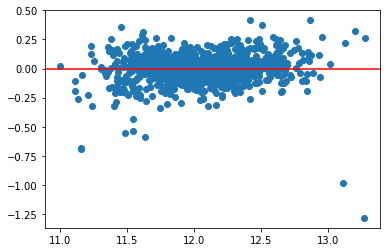

In [163]:
#checking for homoscedasticity.
plt.scatter(y_train_pred,res)
plt.axhline(y=0,color='r')
#Observation: we observe that there is no specific pattern and there is constant variance

### Model Evaluation on test set  using Lasso Regression

In [164]:
#evaluation on test set
y_test_pred=lasso.predict(X_test)

In [165]:
#r2 score for test set
r2_test=r2_score(y_test,y_test_pred)
r2_test

0.8739701565695326

In [166]:
#finding the rss value for test data
rss_test=np.sum(np.square(y_test-y_test_pred))
rss_test

9.118723788028202

In [167]:
#finding the mean squared erroe for test set
mse_test=mean_squared_error(y_test,y_test_pred)
mse_test

0.020771580382752168

In [168]:
#finding the root mean squared error for test set
rmse_test=mse_test**0.5
rmse_test

0.1441234900450033

In [169]:
#lasso regression model Parameters
# Coefficients list
model_lasso_parameters = list(lasso.coef_)
# Inserting Y Intercept to model parameters list
model_lasso_parameters.insert(0, lasso.intercept_)
# Rounding off the coefficients
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, model_lasso_parameters))
lasso_param_list

[('constant', 10.88),
 ('LotFrontage', -0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.565),
 ('OverallCond', 0.21),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.014),
 ('BsmtQual', 0.124),
 ('BsmtExposure', 0.071),
 ('BsmtFinType1', 0.069),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('HeatingQC', 0.051),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('GrLivArea', 0.72),
 ('BsmtFullBath', 0.106),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.135),
 ('HalfBath', 0.082),
 ('BedroomAbvGr', 0.0),
 ('KitchenQual', 0.092),
 ('TotRmsAbvGrd', 0.151),
 ('Fireplaces', 0.0),
 ('FireplaceQu', 0.101),
 ('GarageCars', 0.209),
 ('GarageArea', 0.05),
 ('WoodDeckSF', 0.051),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('YearBuilt_Age', -0.035),
 ('YearRemodAdd_Age', -0.069),
 ('GarageYrBlt_Age', -0.0),
 ('LotShape_IR1', 0.0),
 ('LotShape_IR2', 0.005),
 ('LotShape_Reg', -0.01),
 ('Neighborhood_Blmngtn', -0.0),
 ('Neighborhood_BrDale', -0.0),
 ('Neighborhood_BrkSide', 0.0),

In [170]:
# Finding which variables are efficient in predicting the House price and how well they can Predict it
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]

lasso_params_df=lasso_params_df.reindex(lasso_params_df.Coef.abs().sort_values(ascending=False).index)
lasso_params_df
#Observation : 
#we find that the GrLiveArea has the highest coefficient and it is most significant in predicting the Price of House
#followed by OverallQual-->OverallCond-->GarageCars-->TotRmsAbvGrd-->FullBath-->BsmtQual and so on......

,Params,Coef
0,constant,10.880
17,GrLivArea,0.720
3,OverallQual,0.565
4,OverallCond,0.210
27,GarageCars,0.209
24,TotRmsAbvGrd,0.151
20,FullBath,0.135
7,BsmtQual,0.124
46,Neighborhood_IDOTRR,-0.112
125,MSSubClass_2-STORY-PUD,-0.112


### Ridge Regression

In [171]:
#we know that Ridge regression does not handle feature selection 
#so we will use RFE with ridge regression because we have large number of predictor variables.
from sklearn.feature_selection import RFE

In [172]:
#instantiating an object of linearregression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [173]:
#using RFE for feature selection
rfe=RFE(lm,50)
rfe=rfe.fit(X_train,y_train)

In [174]:
#looking at the features which got selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 71),
 ('ExterQual', False, 72),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 30),
 ('1stFlrSF', False, 19),
 ('2ndFlrSF', False, 67),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 35),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 54),
 ('FireplaceQu', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 16),
 ('WoodDeckSF', False, 13),
 ('OpenPorchSF', False, 33),
 ('EnclosedPorch', False, 52),
 ('YearBuilt_Age', True, 1),
 ('YearRemodAdd_Age', True, 1),
 ('GarageYrBlt_Age', False, 74),
 ('LotShape_IR1', True, 1),
 ('LotShape_IR2', True, 1),
 ('LotShape_Reg',

In [175]:
#selecting the columns for X_train which got selected by RFE
col=X_train.columns[rfe.support_]

In [176]:
#taking only RFE selected variables in X_train
X_train_rfe=X_train[col]

In [177]:
#using ridge regression for regularization
ridge=Ridge()

In [178]:
#defining the number of cross validation folds
folds=5

In [179]:
#cross validation
model_cv=GridSearchCV(estimator=ridge,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,
                      return_train_score=True,verbose=1)

In [180]:
#fitting X_train and y_train on model
model_cv.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    2.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   30.0, 40.0, 50.0, 60.0, 70.0, 80.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [181]:
#getting the best value of alpha
print(model_cv.best_params_)

{'alpha': 0.1}


In [182]:
#fitting the ridge regression at alpha=0.1
alpha_ridge=0.1

In [183]:
#instantiating the ridge object with alpha =0.1
ridge=Ridge(alpha=alpha_ridge)

In [184]:
#fitting X_train and y_train on ridge model
ridge.fit(X_train_rfe,y_train)

Ridge(alpha=0.1)

In [185]:
print(ridge.coef_)

[-0.19842061  0.46005364  0.48226499  0.34241038  0.11894061  0.06433664
  0.07888057 -0.01135891  0.02226594  0.02765648  0.00545268  0.89669759
  0.14635886  0.15389856  0.09634886  0.09116949  0.06683917  0.10997576
  0.08893849  0.24414256 -0.3741899  -0.06236732  0.11533187  0.13167234
  0.1155731   0.06712645  0.16042719  0.18248461  0.04002357  0.152786
  0.14583997  0.06336201  0.1188503   0.16748282  0.0942226   0.08150577
  0.03972296  0.04965204  0.07920192 -0.21777805  0.08479368 -0.03206191
 -0.02863663  0.10130519  0.09891374  0.12768129  0.06144104 -0.17418483
 -0.16933628  0.09024226]


In [186]:
#finding the y_train_pred value
y_train_pred_r=ridge.predict(X_train_rfe)

In [187]:
#finding the r2 score for train data
r2_train_r=r2_score(y_train_pred_r,y_train)
r2_train_r

0.8878732781388223

In [188]:
#finding the residual sum of square error for train set
rss_train_r=np.sum(np.square(y_train_pred_r-y_train))
rss_train_r

16.133739789635175

In [189]:
#finding the mean squared error for train set
mse_train_r=mean_squared_error(y_train_pred_r,y_train)
mse_train_r

0.015801899891905166

In [190]:
#finding the root mean squared error for train set
rmse_train_r=mse_train_r**0.5
rmse_train_r

0.1257056080368142

In [191]:
#finding the residuals
res_r=y_train_pred_r-y_train

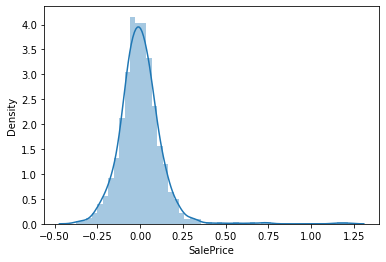

In [192]:
#checking the distribution of the residuals the verify the linear regression assumptions.
sns.distplot(res_r)
plt.show()
#Observation:
#We observe that the rsiduals are normally distributed with mean at 0 so it is a good model.

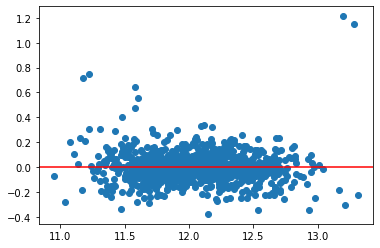

In [193]:
#checking for homoscedasticity.
plt.scatter(y_train_pred_r,res_r)
plt.axhline(y=0,color='r')
#Observation: we observe that there is no specific pattern and there is constant variance

### Model Evaluation on test set using Ridge Regression

In [194]:
#predicting the y_test_pred value using the ridge model
X_test_rfe=X_test[col]
y_test_pred_r=ridge.predict(X_test_rfe)

In [195]:
#getting the R2 score for test set
r2_test_r=r2_score(y_test,y_test_pred_r)
r2_test_r

0.8814178585901391

In [196]:
#finding the rss value for test data
rss_test_r=np.sum(np.square(y_test-y_test_pred_r))
rss_test_r

8.579855090481026

In [197]:
#finding the mean squared erroe for test set
mse_test_r=mean_squared_error(y_test,y_test_pred_r)
mse_test_r

0.019544089044375913

In [198]:
#finding the root mean squared error for test set
rmse_test_r=mse_test_r**0.5
rmse_test_r

0.13980017540895975

In [199]:
#Ridge Regression Model Parameters
# Coefficients list
model_ridge_parameters = list(ridge.coef_)
# Inserting Y Intercept to model parameters list
model_ridge_parameters.insert(0, ridge.intercept_)
# Rounding off the coefficients
model_ridge_parameters = [round(i,3) for i in model_ridge_parameters]

cols = X_train_rfe.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, model_ridge_parameters))
ridge_param_list

[('constant', 10.774),
 ('LotFrontage', -0.198),
 ('LotArea', 0.46),
 ('OverallQual', 0.482),
 ('OverallCond', 0.342),
 ('BsmtQual', 0.119),
 ('BsmtExposure', 0.064),
 ('BsmtFinType1', 0.079),
 ('BsmtFinSF1', -0.011),
 ('BsmtFinSF2', 0.022),
 ('BsmtUnfSF', 0.028),
 ('TotalBsmtSF', 0.005),
 ('GrLivArea', 0.897),
 ('BsmtFullBath', 0.146),
 ('FullBath', 0.154),
 ('HalfBath', 0.096),
 ('BedroomAbvGr', 0.091),
 ('KitchenQual', 0.067),
 ('TotRmsAbvGrd', 0.11),
 ('FireplaceQu', 0.089),
 ('GarageCars', 0.244),
 ('YearBuilt_Age', -0.374),
 ('YearRemodAdd_Age', -0.062),
 ('LotShape_IR1', 0.115),
 ('LotShape_IR2', 0.132),
 ('LotShape_Reg', 0.116),
 ('Neighborhood_BrkSide', 0.067),
 ('Neighborhood_ClearCr', 0.16),
 ('Neighborhood_Crawfor', 0.182),
 ('Neighborhood_NAmes', 0.04),
 ('Neighborhood_NoRidge', 0.153),
 ('Neighborhood_NridgHt', 0.146),
 ('Neighborhood_SWISU', 0.063),
 ('Neighborhood_Somerst', 0.119),
 ('Neighborhood_StoneBr', 0.167),
 ('Neighborhood_Veenker', 0.094),
 ('HouseStyle_1.5Unf'

In [200]:
#Finding the efficient variables in predicting the House price and how well they can Predict it using Ridge Regresion


ridge_params_df = pd.DataFrame({'Params':cols, 'Coef':model_ridge_parameters})
ridge_params_df=ridge_params_df.reindex(ridge_params_df.Coef.abs().sort_values(ascending=False).index)
ridge_params_df

#Observation : 
#we find that the GrLiveArea has the highest coefficient and it is most significant in predicting the Price of House
#followed by OverallQual-->LotArea-->YearBuilt_Age-->OverallCond-->GarageCars and so on......

,Params,Coef
0,constant,10.774
12,GrLivArea,0.897
3,OverallQual,0.482
2,LotArea,0.460
21,YearBuilt_Age,-0.374
4,OverallCond,0.342
20,GarageCars,0.244
40,Exterior1st_BrkComm,-0.218
1,LotFrontage,-0.198
28,Neighborhood_Crawfor,0.182


## Conclusion : Camparing the models created using Ridge and Lasso Regression

#### Evaluating the model Performance Built using Ridge Regression 

In [201]:
#optimal value of alpha for Ridge regression:
alpha_ridge

0.1

In [202]:
#Observing the R2 score of train and test data using Ridge regression
print("R2 score for train set : ",r2_train_r)
print("R2 score for test set : ",r2_test_r)
#Observation : 
#we find that the r2 score for train data is good
#we also get a very good test r2_score. 

R2 score for train set :  0.8878732781388223
R2 score for test set :  0.8814178585901391


In [203]:
#Observing the Residual Sum of Squares of train and test data using Ridge regression
print("Residual Sum of Squares for train set : ",round(rss_train_r,2))
print("Residual Sum of Squares for test set : ",round(rss_test_r,2))

Residual Sum of Squares for train set :  16.13
Residual Sum of Squares for test set :  8.58


In [204]:
#Observing the Mean Squared Error of train and test data using Ridge regression
print("Mean Squared Error for train set : ",round(mse_train_r,2))
print("Mean Squared Error for test set : ",round(mse_test_r,2))

Mean Squared Error for train set :  0.02
Mean Squared Error for test set :  0.02


In [205]:
#Observing the Root Mean Squared Error of train and test data using Ridge regression
print("Root Mean Squared Error for train set : ",round(rmse_train_r,2))
print("Root Mean Squared Error for test set : ",round(rmse_test_r,2)) 

Root Mean Squared Error for train set :  0.13
Root Mean Squared Error for test set :  0.14


In [206]:
#Top 10 features for Predicting the house Price using Ridge Regression
ridge_params_df.head(11)

,Params,Coef
0,constant,10.774
12,GrLivArea,0.897
3,OverallQual,0.482
2,LotArea,0.460
21,YearBuilt_Age,-0.374
4,OverallCond,0.342
20,GarageCars,0.244
40,Exterior1st_BrkComm,-0.218
1,LotFrontage,-0.198
28,Neighborhood_Crawfor,0.182


#### Evaluating the model Performance Built using Lasso Regression 

In [207]:
#optimal value of alpha for lasso regression
alpha_lasso

0.001

In [208]:
#Observing the R2 score of train and test data using Lasso regression
print("R2 score for train set : ",r2_train)
print("R2 score for test set : ",r2_test)
#Observation : 
#we find that the r2 score for train data is good
# we also get a very good test r2_score. 

R2 score for train set :  0.8952981610917785
R2 score for test set :  0.8739701565695326


In [209]:
#Observing the Residual Sum of Squares of train and test data using Lasso regression
print("Residual Sum of Squares for train set : ",round(rss_train,2))
print("Residual Sum of Squares for test set : ",round(rss_test,2))

Residual Sum of Squares for train set :  16.8
Residual Sum of Squares for test set :  9.12


In [210]:
#Observing the Mean Squared Error of train and test data using Lasso regression
print("Mean Squared Error for train set : ",round(mse_train,2))
print("Mean Squared Error for test set : ",round(mse_test,2))

Mean Squared Error for train set :  0.02
Mean Squared Error for test set :  0.02


In [211]:
#Observing the Root Mean Squared Error of train and test data using Lasso regression
print("Root Mean Squared Error for train set : ",round(rmse_train,2))
print("Root Mean Squared Error for test set : ",round(rmse_test,2))

Root Mean Squared Error for train set :  0.13
Root Mean Squared Error for test set :  0.14


In [212]:
#Top 10 features for Predicting the house Price using Lasso Regression
lasso_params_df.head(11)

,Params,Coef
0,constant,10.880
17,GrLivArea,0.720
3,OverallQual,0.565
4,OverallCond,0.210
27,GarageCars,0.209
24,TotRmsAbvGrd,0.151
20,FullBath,0.135
7,BsmtQual,0.124
46,Neighborhood_IDOTRR,-0.112
125,MSSubClass_2-STORY-PUD,-0.112


### Selecting the best model

we will select the Ridge regression model because it is performing better that the Lasso regression model.

Ridge : r2 score on test data is around 88%

Ridge : r2 score for train data it is around 89%

For Ridge regression optimal alpha = 0.1

The top ten features for model prediction using Ridge Regression model are:

1.GrLivArea

2.OverallQual

3.LotArea

4.YearBuilt_Age

5.OverallCond

6.GarageCars

7.Exterior1st_BrkComm

8.LotFrontage

9.Neighborhood_Crawfor

10.MSSubClass_2-Story-PUD